In [ ]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import folium
from folium import plugins
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor

In [ ]:
pip install xgboost

In [ ]:
#Loading the dataset
dataframe= pd.read_csv('finalbayareadata.csv')

In [ ]:
dataframe.columns

Index(['zpId', 'Parking', 'streetAddress', 'lotAreaUnits', 'arm5Rate',
       'daysOnZillow', 'hdpUrl', 'datePosted', 'isBankOwned', 'dateSold',
       'zipcode', 'lastSoldPrice', 'livingAreaUnitsShort', 'livingAreaValue',
       'lotSize', 'Zestimate Average _2018', 'description', 'stories',
       'livingArea', 'Zestimate Average _2023', 'latitude',
       'Zestimate Average _2021', 'isZillowOwned', 'Price/sqft',
       'wasForeclosed', 'Year Built', 'Zestimate Average _2019',
       'taxAssessedValue', 'city', 'Zestimate Average _2020', 'longitude',
       'community', 'state', 'county', 'address', 'bathrooms', 'listPrice',
       'thirtyYearFixedRate', 'zestimate', 'bedrooms', 'neighborhood',
       'isListedByOwner', 'lotAreaValue', 'fifteenYearFixedRate',
       'taxAssessedYear', 'Zestimate Average _2022', 'homeType'],
      dtype='object')

In [ ]:
dataframe.isna().sum()

zpId                          1
Parking                      80
streetAddress                 1
lotAreaUnits                  1
arm5Rate                     15
daysOnZillow                  6
hdpUrl                        1
datePosted                    8
isBankOwned                   1
dateSold                    775
zipcode                       1
lastSoldPrice               775
livingAreaUnitsShort         22
livingAreaValue              22
lotSize                     265
Zestimate Average _2018     656
description                  14
stories                     977
livingArea                   22
Zestimate Average _2023     321
latitude                      3
Zestimate Average _2021     568
isZillowOwned                 1
Price/sqft                  162
wasForeclosed                 1
Year Built                   86
Zestimate Average _2019     644
taxAssessedValue            436
city                          1
Zestimate Average _2020     562
longitude                     3
communit

In [ ]:
# Convert Unix timestamp to datetime
dataframe['dateSold'] = pd.to_datetime(dataframe['dateSold'], unit='ms')

In [ ]:
dataframe['datePosted'].unique()

array(['2023-10-25', '2023-10-24', '2023-10-23', '2023-10-22',
       '2023-10-21', '2023-10-20', '2023-10-19', '2023-10-18',
       '2023-10-17', '2023-10-16', '2023-10-15', '2023-10-14',
       '2023-10-13', '2023-10-12', '2023-10-11', '2023-10-10',
       '2023-10-09', '2023-10-08', '2023-10-07', '2023-10-06',
       '2023-10-05', '2023-10-04', '2023-10-03', '2023-10-02',
       '2023-10-01', '2023-09-30', '2023-09-29', nan, '2023-09-28',
       '2023-09-27', '2023-09-26', '2023-09-25', '2023-09-24',
       '2023-09-23', '2023-09-22', '2023-09-21', '2023-09-20',
       '2023-09-19', '2023-09-18', '2023-09-17', '2023-09-16',
       '2023-09-15', '2023-09-14', '2023-09-13', '2023-09-12',
       '2023-09-11', '2023-09-10', '2023-09-09', '2023-09-08',
       '2023-09-07', '2023-09-06', '2023-09-05', '2023-09-04',
       '2023-09-02', '2023-09-01', '2023-08-31', '2023-08-30',
       '2023-08-29', '2023-08-28', '2023-08-26', '2023-08-25',
       '2023-08-24', '2023-08-23', '2023-08-22', '

In [ ]:
#Removing unnecessary columns
dataframe= dataframe.drop('neighborhood',axis=1)
dataframe= dataframe.drop('community',axis=1)
dataframe= dataframe.drop('livingArea',axis=1)
dataframe = dataframe.drop('livingAreaUnitsShort',axis=1)
dataframe = dataframe.drop('taxAssessedYear',axis=1)
dataframe = dataframe.drop('taxAssessedValue',axis=1)
dataframe = dataframe.drop('lotSize',axis=1)

In [ ]:
dataframe.isna().sum()

zpId                         1
Parking                     80
streetAddress                1
lotAreaUnits                 1
arm5Rate                    15
daysOnZillow                 6
hdpUrl                       1
datePosted                   8
isBankOwned                  1
dateSold                   775
zipcode                      1
lastSoldPrice              775
livingAreaValue             22
Zestimate Average _2018    656
description                 14
stories                    977
Zestimate Average _2023    321
latitude                     3
Zestimate Average _2021    568
isZillowOwned                1
Price/sqft                 162
wasForeclosed                1
Year Built                  86
Zestimate Average _2019    644
city                         1
Zestimate Average _2020    562
longitude                    3
state                        1
county                       1
address                      0
bathrooms                  150
listPrice                    4
thirtyYe

In [ ]:
dataframe['city'].unique()

array(['San Jose', 'Campbell', 'Milpitas', 'Alviso', 'San jose',
       'San Francisco', 'Oakland', 'Emeryville', 'Berkeley', nan],
      dtype=object)

In [ ]:
#Correcting  the naming convention of San Jose
dataframe['city'] = dataframe['city'].replace('San jose', 'San Jose')

In [ ]:
#Removing the falsely present cities
unnecessarycity= ['Alviso','Campbell','Berkeley','Emeryville','Milpitas']
for i in unnecessarycity:
    dataframe.drop(dataframe[dataframe['city'] == i].index, inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [ ]:
#Dropping of Nan Values in columns
columns_to_check = ['zpId', 'zipcode', 'city','arm5Rate', 'daysOnZillow', 'fifteenYearFixedRate','thirtyYearFixedRate']
dataframe.dropna(subset=columns_to_check, inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                     66
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   739
zipcode                      0
lastSoldPrice              739
livingAreaValue             18
Zestimate Average _2018    615
description                 13
stories                    941
Zestimate Average _2023    293
latitude                     0
Zestimate Average _2021    531
isZillowOwned                0
Price/sqft                 139
wasForeclosed                0
Year Built                  67
Zestimate Average _2019    605
city                         0
Zestimate Average _2020    524
longitude                    0
state                        0
county                       0
address                      0
bathrooms                  137
listPrice                    0
thirtyYe

In [ ]:
dataframe['homeType'].unique()

array(['SINGLE_FAMILY', 'CONDO', 'TOWNHOUSE', 'MANUFACTURED',
       'MULTI_FAMILY', 'LOT', 'APARTMENT'], dtype=object)

In [ ]:
#Setting Year Built to 0 for the land plots
totalarea = dataframe[
    (dataframe['lotAreaUnits'] == 'Acres') &
    ((dataframe['bedrooms'].isnull()) | (dataframe['bedrooms'] == 0)) &
    ((dataframe['bathrooms'].isnull()) | (dataframe['bathrooms'] == 0)) &
    ((dataframe['stories'].isnull()) | (dataframe['stories'] == 0))
].index.tolist()

In [ ]:
#Setting Year Built to 0  to land area
for i in totalarea:
    dataframe.at[i, 'bedrooms'] = 0
    dataframe.at[i, 'bathrooms'] = 0
    dataframe.at[i, 'stories'] = 0
    dataframe.at[i, 'zestimate'] = 0
    dataframe.at[i, 'Year Built'] = 0

In [ ]:
lotindex = dataframe[dataframe['homeType']=='LOT'].index.tolist()

In [ ]:
#Setting 0 values to Lot area
for i in lotindex:
    dataframe.at[i, 'bedrooms'] = 0
    dataframe.at[i, 'bathrooms'] = 0
    dataframe.at[i, 'stories'] = 0
    dataframe.at[i, 'zestimate'] = 0
    dataframe.at[i, 'Year Built'] = 0

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                     66
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   739
zipcode                      0
lastSoldPrice              739
livingAreaValue             18
Zestimate Average _2018    615
description                 13
stories                    866
Zestimate Average _2023    293
latitude                     0
Zestimate Average _2021    531
isZillowOwned                0
Price/sqft                 139
wasForeclosed                0
Year Built                   1
Zestimate Average _2019    605
city                         0
Zestimate Average _2020    524
longitude                    0
state                        0
county                       0
address                      0
bathrooms                   74
listPrice                    0
thirtyYe

In [ ]:
#Setting common unit of Sqaure Feet to all the houses listings
for i in dataframe['lotAreaUnits'].index:
    if dataframe['lotAreaUnits'].iloc[i]=='sqft':
        dataframe['lotAreaUnits'].iloc[i]='Square Feet'

<ipython-input-22-99beec8a323b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['lotAreaUnits'].iloc[i]='Square Feet'


In [ ]:
# Changing the column name to help analysis
dataframe.rename(columns={'Price/sqft': 'Price_per_unit'}, inplace=True)
dataframe['Price_per_unit'] = dataframe['Price_per_unit'].replace({'\$': ''}, regex=True)
dataframe['Price_per_unit'] = dataframe['Price_per_unit'].str.replace(',', '').astype(float)

In [ ]:
dataframe.columns

Index(['zpId', 'Parking', 'streetAddress', 'lotAreaUnits', 'arm5Rate',
       'daysOnZillow', 'hdpUrl', 'datePosted', 'isBankOwned', 'dateSold',
       'zipcode', 'lastSoldPrice', 'livingAreaValue',
       'Zestimate Average _2018', 'description', 'stories',
       'Zestimate Average _2023', 'latitude', 'Zestimate Average _2021',
       'isZillowOwned', 'Price_per_unit', 'wasForeclosed', 'Year Built',
       'Zestimate Average _2019', 'city', 'Zestimate Average _2020',
       'longitude', 'state', 'county', 'address', 'bathrooms', 'listPrice',
       'thirtyYearFixedRate', 'zestimate', 'bedrooms', 'isListedByOwner',
       'lotAreaValue', 'fifteenYearFixedRate', 'Zestimate Average _2022',
       'homeType'],
      dtype='object')

In [ ]:
dataframe['lotAreaUnits'].value_counts()

Square Feet    1784
Acres           323
Name: lotAreaUnits, dtype: int64

In [ ]:
land= dataframe[dataframe['lotAreaUnits']=='Acres']
land

zpId                   Parking            streetAddress  \
8     1.977907e+07  2 Attached Garage spaces             4110 Golf Dr   
17    1.981431e+07  2 Attached Garage spaces        707 River View Dr   
20    1.983750e+07  2 Attached Garage spaces          736 Dalewood Ct   
60    1.977645e+07                       NaN    1073 Vista Del Mar Dr   
73    1.978475e+07          2 Carport spaces         14194 Clayton Rd   
...            ...                       ...                      ...   
2071  2.499862e+08                       NaN              Outlook Ave   
2077  1.195864e+08            1 Garage space  3 Embarcadero W APT 233   
2087  2.057578e+09          3 Parking spaces         1015 Campbell St   
2092  2.086855e+09                       NaN            0 Fontaine St   
2104  2.474465e+07   1 Covered Parking space  466 Crescent St APT 121   

     lotAreaUnits  arm5Rate  daysOnZillow  \
8           Acres     7.291           0.0   
17          Acres     7.291           0.0   
20          Acres     7.543           0.0   
60          Acres     7.291           3.0   
73          Acres     7.543           4.0   
...           ...       ...           ...   
2071        Acres     7.359         110.0   
2077        Acres     7.359         111.0   
2087        Acres     7.283         119.0   
2092        Acres     6.625         121.0   
2104        Acres     7.359         125.0   

                                                 hdpUrl  datePosted  \
8     /homedetails/4110-Golf-Dr-San-Jose-CA-95127/19...  2023-10-25   
17    /homedetails/707-River-View-Dr-San-Jose-CA-951...  2023-10-24   
20    /homedetails/736-Dalewood-Ct-San-Jose-CA-95120...  2023-10-24   
60    /homedetails/1073-Vista-Del-Mar-Dr-San-Jose-CA...  2023-10-22   
73    /homedetails/14194-Clayton-Rd-San-Jose-CA-9512...  2023-10-20   
...                                                 ...         ...   
2071  /homedetails/Outlook-Ave-Oakland-CA-94608/2499...  2023-07-07   
2077  /homedetails/3-Embarcadero-W-APT-233-Oakland-C...  2023-07-06   
2087  /homedetails/1015-Campbell-St-Oakland-CA-94607...  2023-06-28   
2092  /homedetails/0-Fontaine-St-Oakland-CA-94605/20...  2023-06-26   
2104  /homedetails/466-Crescent-St-APT-121-Oakland-C...  2023-06-22   

     isBankOwned   dateSold  ...  bathrooms  listPrice  thirtyYearFixedRate  \
8          False 2015-04-13  ...        3.0  1198000.0                7.641   
17         False 1996-06-28  ...        2.0  1099000.0                7.641   
20         False 1997-07-15  ...        4.0  2290000.0                7.676   
60         False 2021-06-15  ...        0.0   800000.0                7.641   
73         False 2015-02-07  ...        2.0  1399888.0                7.676   
...          ...        ...  ...        ...        ...                  ...   
2071       False        NaT  ...        0.0   349900.0                7.807   
2077       False 2011-06-24  ...        2.0   498000.0                7.807   
2087       False        NaT  ...        0.0   999000.0                7.646   
2092       False        NaT  ...        0.0   199000.0                7.491   
2104       False 2009-06-05  ...        1.0   289000.0                7.807   

      zestimate bedrooms  isListedByOwner  lotAreaValue  fifteenYearFixedRate  \
8     1218900.0      2.0            False      0.282025                 6.936   
17    1117700.0      3.0            False      0.378306                 6.936   
20    2291900.0      5.0            False      0.267837                 7.522   
60          0.0      0.0            False      0.350000                 6.936   
73    1408800.0      3.0            False      0.984596                 7.522   
...         ...      ...              ...           ...                   ...   
2071        0.0      0.0            False      0.660000                 6.867   
2077   482900.0      1.0            False     23.025000                 6.867   
2087        NaN      6.0            False      0.307300          

In [ ]:
dataframe['lotAreaUnits'].value_counts()

Square Feet    1784
Acres           323
Name: lotAreaUnits, dtype: int64

In [ ]:
null_indices = dataframe[dataframe['Price_per_unit'].isnull()].index
print(null_indices)

Int64Index([  60,   81,  106,  533,  559,  566,  573,  574,  586,  587,
            ...
            2027, 2051, 2052, 2057, 2062, 2067, 2071, 2086, 2092, 2094],
           dtype='int64', length=139)


In [ ]:
hometypes_of_null_indices = dataframe.loc[null_indices, 'homeType']
print(hometypes_of_null_indices.unique())

['LOT' 'SINGLE_FAMILY' 'MULTI_FAMILY' 'CONDO']


In [ ]:
lot_indices = null_indices[dataframe.loc[null_indices, 'homeType'] == 'LOT']
print(lot_indices)

Int64Index([  60,   81,  106,  533,  559,  566,  573,  574,  586,  587,  609,
             789,  790, 1028, 1318, 1347, 1400, 1402, 1480, 1481, 1482, 1483,
            1485, 1549, 1550, 1562, 1574, 1589, 1685, 1695, 1726, 1738, 1745,
            1757, 1793, 1798, 1800, 1801, 1847, 1849, 1863, 1864, 1889, 1890,
            1892, 1897, 1899, 1901, 1902, 1921, 1938, 1949, 1986, 1988, 1999,
            2003, 2004, 2022, 2023, 2052, 2057, 2062, 2067, 2071, 2092, 2094],
           dtype='int64')


In [ ]:
# Identify rows with missing 'Price/unit'
price_unit_null = dataframe[dataframe['Price_per_unit'].isnull()]

for index, row in price_unit_null.iterrows():
    if row['homeType'] == 'LOT':
        # Check if Lot area value and list price are nan or not
        if np.isnan(row['lotAreaValue']) or np.isnan(row['listPrice']):
            # Drop the rows if Lot area value or list price is nan
            dataframe.drop(index, axis=0, inplace=True)
        else:
            # Compute Price_per_squarefeet as List price / Lot area value
            dataframe.at[index, 'Price_per_unit'] = row['listPrice'] / row['lotAreaValue']
    else:
        # Check if living area value and list price are nan or not
        if np.isnan(row['livingAreaValue']) or np.isnan(row['listPrice']) or row['livingAreaValue'] == 0.0:
            # Drop the rows if living area value or list price is nan, or living area value is 0.0
            dataframe.drop(index, axis=0, inplace=True)
        else:
            # Compute price_per_unit as List price / living area value
            dataframe.at[index, 'Price_per_unit'] = row['listPrice'] / row['livingAreaValue']
dataframe.reset_index(drop=True, inplace=True)

In [ ]:
#Corrected Land units to Square Feet
land= dataframe[dataframe['lotAreaUnits']=='Acres']
for i in land.index:
    if not pd.isnull(dataframe.at[i, 'bedrooms']):
        if not pd.isnull(dataframe.at[i, 'bathrooms']):
            dataframe['lotAreaUnits'].iloc[i] ='Square Feet'

<ipython-input-32-01d09b99e172>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['lotAreaUnits'].iloc[i] ='Square Feet'


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2036 entries, 0 to 2035
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   zpId                     2036 non-null   float64       
 1   Parking                  1970 non-null   object        
 2   streetAddress            2036 non-null   object        
 3   lotAreaUnits             2036 non-null   object        
 4   arm5Rate                 2036 non-null   float64       
 5   daysOnZillow             2036 non-null   float64       
 6   hdpUrl                   2036 non-null   object        
 7   datePosted               2034 non-null   object        
 8   isBankOwned              2036 non-null   object        
 9   dateSold                 1332 non-null   datetime64[ns]
 10  zipcode                  2036 non-null   float64       
 11  lastSoldPrice            1332 non-null   float64       
 12  livingAreaValue          2018 non-

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                     66
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   704
zipcode                      0
lastSoldPrice              704
livingAreaValue             18
Zestimate Average _2018    582
description                 11
stories                    813
Zestimate Average _2023    277
latitude                     0
Zestimate Average _2021    499
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   1
Zestimate Average _2019    575
city                         0
Zestimate Average _2020    495
longitude                    0
state                        0
county                       0
address                      0
bathrooms                   74
listPrice                    0
thirtyYe

In [ ]:
#Imputing bedrooms from zipcodes
grouped = dataframe.groupby('zipcode')
for zipcode, group in grouped:
    nan_bedrooms = group[group['bedrooms'].isnull()]
    non_nan_bedrooms = group[group['bedrooms'].notnull()]

    for index, row in nan_bedrooms.iterrows():
        for idx, r in non_nan_bedrooms.iterrows():
            if abs(row['livingAreaValue'] - r['livingAreaValue']) <= 500:
                dataframe.at[index, 'bedrooms'] = r['bedrooms']
                break

In [ ]:
#Extracting bedrooms from description
bedrooms_null= dataframe[dataframe['bedrooms'].isnull()].index.tolist()

for i in bedrooms_null:
    description = str(dataframe.at[i, 'description'])
    bedrooms = re.search(r'(\d+)(?=\s*bed|bedroom|bedrooms)', description, flags=re.IGNORECASE)
    if bedrooms:
        dataframe.at[i, 'bedrooms'] = int(bedrooms.group(0))


In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                     66
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   704
zipcode                      0
lastSoldPrice              704
livingAreaValue             18
Zestimate Average _2018    582
description                 11
stories                    813
Zestimate Average _2023    277
latitude                     0
Zestimate Average _2021    499
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   1
Zestimate Average _2019    575
city                         0
Zestimate Average _2020    495
longitude                    0
state                        0
county                       0
address                      0
bathrooms                   74
listPrice                    0
thirtyYe

In [ ]:
#Dropping the pending nan values
dataframe.dropna(subset=['bedrooms'], inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                     66
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   684
zipcode                      0
lastSoldPrice              684
livingAreaValue             18
Zestimate Average _2018    558
description                  8
stories                    793
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   1
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                   59
listPrice                    0
thirtyYe

In [ ]:
#Imputing bathrooms from zipcodes
grouped = dataframe.groupby('zipcode')

for zipcode, group in grouped:
    nan_bedrooms = group[group['bathrooms'].isnull()]
    non_nan_bedrooms = group[group['bathrooms'].notnull()]

    for index, row in nan_bedrooms.iterrows():
        for idx, r in non_nan_bedrooms.iterrows():
            if abs(row['livingAreaValue'] - r['livingAreaValue']) <= 500:
                dataframe.at[index, 'bathrooms'] = r['bathrooms']
                # Break if a match is found for efficiency (optional)
                break

In [ ]:
#Extracting Bathrooms from description
bathrooms_null= dataframe[dataframe['bathrooms'].isnull()].index.tolist()
for i in bathrooms_null:
    description= str(dataframe.at[i, 'description'])
    bathrooms = re.search(r'(\d+(\.\d+)?)\s*(bath|bathroom|baths|bathrooms)', description, flags=re.IGNORECASE)
    if bathrooms:
        dataframe.at[i, 'bathrooms'] = float(bathrooms.group(1))


In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                     66
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   684
zipcode                      0
lastSoldPrice              684
livingAreaValue             18
Zestimate Average _2018    558
description                  8
stories                    793
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   1
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
#Setting Stories feature of Land plots and 1B 1B to 0
# Condition 1: Bedrooms and Bathrooms are both 1.0
dataframe.loc[(dataframe['bedrooms'] == 1.0) & (dataframe['bathrooms'] == 1.0), 'stories'] = 0

# Condition 2: LotAreaUnits are 'Acres' as empty lands doesnt have stories
dataframe.loc[dataframe['lotAreaUnits'] == 'Acres', 'stories'] = 0

# Condition 3: HomeType is 'Condo' as Condo doesnt have stories
dataframe.loc[dataframe['homeType'] == 'Condo', 'stories'] = 0

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                     66
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   684
zipcode                      0
lastSoldPrice              684
livingAreaValue             18
Zestimate Average _2018    558
description                  8
stories                    713
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   1
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
null_indices_stories = dataframe[dataframe['stories'].isnull()].index

In [ ]:
null_indices_stories

Int64Index([  14,   19,   32,   36,   39,   42,   45,   51,   56,   63,
            ...
            1975, 1986, 1988, 1989, 1991, 1992, 1998, 1999, 2001, 2006],
           dtype='int64', length=713)

In [ ]:
dataframe['stories'].interpolate(method='nearest', inplace=True)

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                     66
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   684
zipcode                      0
lastSoldPrice              684
livingAreaValue             18
Zestimate Average _2018    558
description                  8
stories                      0
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   1
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
dataframe['stories'].unique()

array([ 2.,  1.,  3.,  0.,  4., 23.,  6.,  5.,  8., 37., 10.])

In [ ]:
# Update 'description' column
dataframe['description'].fillna('No Information Provided', inplace=True)

# Update 'parking' column
dataframe['Parking'].fillna('No Information Provided', inplace=True)

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                      0
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   684
zipcode                      0
lastSoldPrice              684
livingAreaValue             18
Zestimate Average _2018    558
description                  0
stories                      0
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   1
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
#Calculating the index of nan values in Year Built column
yb = dataframe[dataframe['Year Built'].isnull()].index.tolist()

In [ ]:
#Imputing Year Built from description
year_pattern = r'\b(?:built in|year built|built)\s(\d{4})\b'

# Function to extract year from description
def extract_year(description):
    match = re.search(year_pattern, description, flags=re.IGNORECASE)
    if match:
        return int(match.group(1))  # Extracting the year part
    return None  # If no year is found

for i in yb:
    description = dataframe['description'].iloc[i]
    year_built = extract_year(description)
    dataframe.at[i, 'Year Built'] = year_built


In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                      0
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   684
zipcode                      0
lastSoldPrice              684
livingAreaValue             18
Zestimate Average _2018    558
description                  0
stories                      0
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   0
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
ds_null = dataframe[dataframe['dateSold'].isnull()].index.tolist()

Null values in the Date Sold indicates that these are properties which have never been sold before

In [ ]:
ds_null

[3,
 4,
 14,
 26,
 27,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 44,
 45,
 48,
 51,
 55,
 56,
 63,
 64,
 65,
 66,
 74,
 75,
 76,
 80,
 81,
 82,
 83,
 84,
 87,
 90,
 91,
 92,
 94,
 96,
 99,
 102,
 107,
 108,
 110,
 114,
 117,
 125,
 129,
 143,
 153,
 157,
 159,
 160,
 163,
 165,
 166,
 167,
 175,
 177,
 181,
 185,
 187,
 188,
 190,
 191,
 193,
 194,
 196,
 197,
 198,
 202,
 203,
 207,
 210,
 218,
 221,
 235,
 238,
 246,
 247,
 248,
 249,
 250,
 253,
 254,
 255,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 269,
 271,
 274,
 275,
 281,
 290,
 291,
 293,
 300,
 302,
 310,
 312,
 313,
 319,
 322,
 323,
 324,
 330,
 340,
 344,
 345,
 349,
 354,
 355,
 358,
 359,
 360,
 361,
 363,
 364,
 365,
 367,
 372,
 375,
 376,
 377,
 382,
 389,
 391,
 392,
 394,
 396,
 401,
 402,
 404,
 406,
 408,
 409,
 410,
 417,
 421,
 431,
 432,
 440,
 455,
 468,
 469,
 474,
 477,
 484,
 486,
 487,
 493,
 500,
 511,
 520,
 521,
 522,
 524,
 525,
 526,
 529,
 530,
 532,
 536,
 539,
 546,
 549,
 551,
 557,
 560,
 562,
 5

In [ ]:
lsp_null = dataframe[dataframe['lastSoldPrice'].isnull()].index.tolist()

In [ ]:
if lsp_null == ds_null:
    print("The lists are the same.")

The lists are the same.


The Indices of null values in both last sold price and data sold, Indicate that these are indices of the houses which are not been sold yet, Hence the last sold price would be equal to list Price  

In [ ]:
for i in lsp_null:
    dataframe['lastSoldPrice'].iloc[i] = dataframe['listPrice'].iloc[i]

<ipython-input-59-67cfe1982db5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['lastSoldPrice'].iloc[i] = dataframe['listPrice'].iloc[i]


In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                      0
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   2
isBankOwned                  0
dateSold                   684
zipcode                      0
lastSoldPrice                0
livingAreaValue             18
Zestimate Average _2018    558
description                  0
stories                      0
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   0
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
#Setting the datesold of all the never being sold listings to 01-01-2000
dataframe['dateSold'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

In [ ]:
#Dropping the null values in the date posted column
dataframe.dropna(subset=['datePosted'], inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                      0
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   0
isBankOwned                  0
dateSold                     0
zipcode                      0
lastSoldPrice                0
livingAreaValue             18
Zestimate Average _2018    558
description                  0
stories                      0
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   0
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
lv_null = dataframe[dataframe['livingAreaValue'].isnull()].index.tolist()

In [ ]:
lv_null

[80,
 105,
 526,
 552,
 559,
 565,
 566,
 578,
 579,
 769,
 770,
 1248,
 1272,
 1402,
 1803,
 1906,
 1961,
 1971]

In [ ]:
for i in lv_null:
    home_type=dataframe['homeType'].iloc[i]
    print(home_type)

LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT
LOT


As the null indices in living area value all have LOT hometype, As LOT doesnt have living area hence these are set to 0.

In [ ]:
#Setting the Living Area of LOT fields to 0
dataframe['livingAreaValue'].fillna(0, inplace=True)

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                      0
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   0
isBankOwned                  0
dateSold                     0
zipcode                      0
lastSoldPrice                0
livingAreaValue              0
Zestimate Average _2018    558
description                  0
stories                      0
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   0
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
#Calculating the index of Lot Area values
null_lotareavalue_indexes = dataframe[dataframe['lotAreaValue'].isnull()].index.tolist()

In [ ]:
#Setting Lot Area Values of Condo and Manufactured to 0 as these doesnt have a lot area
for i in null_lotareavalue_indexes:
    if dataframe['homeType'].iloc[i]=='CONDO':
        dataframe['lotAreaValue'].iloc[i]=0
    if dataframe['homeType'].iloc[i]=='MANUFACTURED':
        dataframe['lotAreaValue'].iloc[i]=0

<ipython-input-70-e9d0aaf5cf5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['lotAreaValue'].iloc[i]=0
<ipython-input-70-e9d0aaf5cf5c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['lotAreaValue'].iloc[i]=0


In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                      0
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   0
isBankOwned                  0
dateSold                     0
zipcode                      0
lastSoldPrice                0
livingAreaValue              0
Zestimate Average _2018    558
description                  0
stories                      0
Zestimate Average _2023    259
latitude                     0
Zestimate Average _2021    475
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   0
Zestimate Average _2019    551
city                         0
Zestimate Average _2020    473
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
lotarea_null = dataframe[dataframe['lotAreaValue'].isnull()].index.tolist()
lotarea_null

[16, 124, 158, 183, 224, 275, 281, 563, 611, 634, 691, 717, 757, 775, 1797]

In [ ]:
#Dropping the lot area value index
dataframe.drop(index=lotarea_null, inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [ ]:
dataframe.isna().sum()

zpId                         0
Parking                      0
streetAddress                0
lotAreaUnits                 0
arm5Rate                     0
daysOnZillow                 0
hdpUrl                       0
datePosted                   0
isBankOwned                  0
dateSold                     0
zipcode                      0
lastSoldPrice                0
livingAreaValue              0
Zestimate Average _2018    549
description                  0
stories                      0
Zestimate Average _2023    251
latitude                     0
Zestimate Average _2021    466
isZillowOwned                0
Price_per_unit               0
wasForeclosed                0
Year Built                   0
Zestimate Average _2019    541
city                         0
Zestimate Average _2020    463
longitude                    0
state                        0
county                       0
address                      0
bathrooms                    0
listPrice                    0
thirtyYe

In [ ]:
#Filling the nan values in Zestimate Averages column with 0
dataframe['Zestimate Average _2018'].fillna(0, inplace=True)
dataframe['Zestimate Average _2019'].fillna(0, inplace=True)
dataframe['Zestimate Average _2020'].fillna(0, inplace=True)
dataframe['Zestimate Average _2021'].fillna(0, inplace=True)
dataframe['Zestimate Average _2022'].fillna(0, inplace=True)

In [ ]:
# Get indexes where 'zestimate' column is null
null_zestimate_indexes = dataframe[dataframe['zestimate'].isnull()].index

#Imputing those values from Zestimate average if not then from list Price
for idx in null_zestimate_indexes:
    if not pd.isnull(dataframe.at[idx, 'Zestimate Average _2023']):
        dataframe.at[idx, 'zestimate'] = dataframe.at[idx, 'Zestimate Average _2023']
    else:
        dataframe.at[idx, 'zestimate'] = dataframe.at[idx, 'listPrice']


In [ ]:
# Get indexes where 'Zestimate Average_2023' column is null

null_zestimate_2023_indexes = dataframe[dataframe['Zestimate Average _2023'].isnull()].index.tolist()

#Imputing those values from Zestimate column if not then from list Price
for idx in null_zestimate_2023_indexes:
    if not pd.isnull(dataframe.at[idx, 'zestimate']):
        dataframe.at[idx, 'Zestimate Average _2023'] = dataframe.at[idx, 'zestimate']
    else:
        dataframe.at[idx, 'Zestimate Average _2023'] = dataframe.at[idx, 'listPrice']


In [ ]:
dataframe.isna().sum()

zpId                       0
Parking                    0
streetAddress              0
lotAreaUnits               0
arm5Rate                   0
daysOnZillow               0
hdpUrl                     0
datePosted                 0
isBankOwned                0
dateSold                   0
zipcode                    0
lastSoldPrice              0
livingAreaValue            0
Zestimate Average _2018    0
description                0
stories                    0
Zestimate Average _2023    0
latitude                   0
Zestimate Average _2021    0
isZillowOwned              0
Price_per_unit             0
wasForeclosed              0
Year Built                 0
Zestimate Average _2019    0
city                       0
Zestimate Average _2020    0
longitude                  0
state                      0
county                     0
address                    0
bathrooms                  0
listPrice                  0
thirtyYearFixedRate        0
zestimate                  0
bedrooms      

In [ ]:
#Transforming the string columns into int
dataframe['zpId'] = dataframe['zpId'].astype(int)

In [ ]:
#Computing the age of listings
current_year = datetime.datetime.now().year
dataframe['Age_inYears'] = current_year - dataframe['Year Built']

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   zpId                     1992 non-null   int64         
 1   Parking                  1992 non-null   object        
 2   streetAddress            1992 non-null   object        
 3   lotAreaUnits             1992 non-null   object        
 4   arm5Rate                 1992 non-null   float64       
 5   daysOnZillow             1992 non-null   float64       
 6   hdpUrl                   1992 non-null   object        
 7   datePosted               1992 non-null   object        
 8   isBankOwned              1992 non-null   object        
 9   dateSold                 1992 non-null   datetime64[ns]
 10  zipcode                  1992 non-null   float64       
 11  lastSoldPrice            1992 non-null   float64       
 12  livingAreaValue          1992 non-

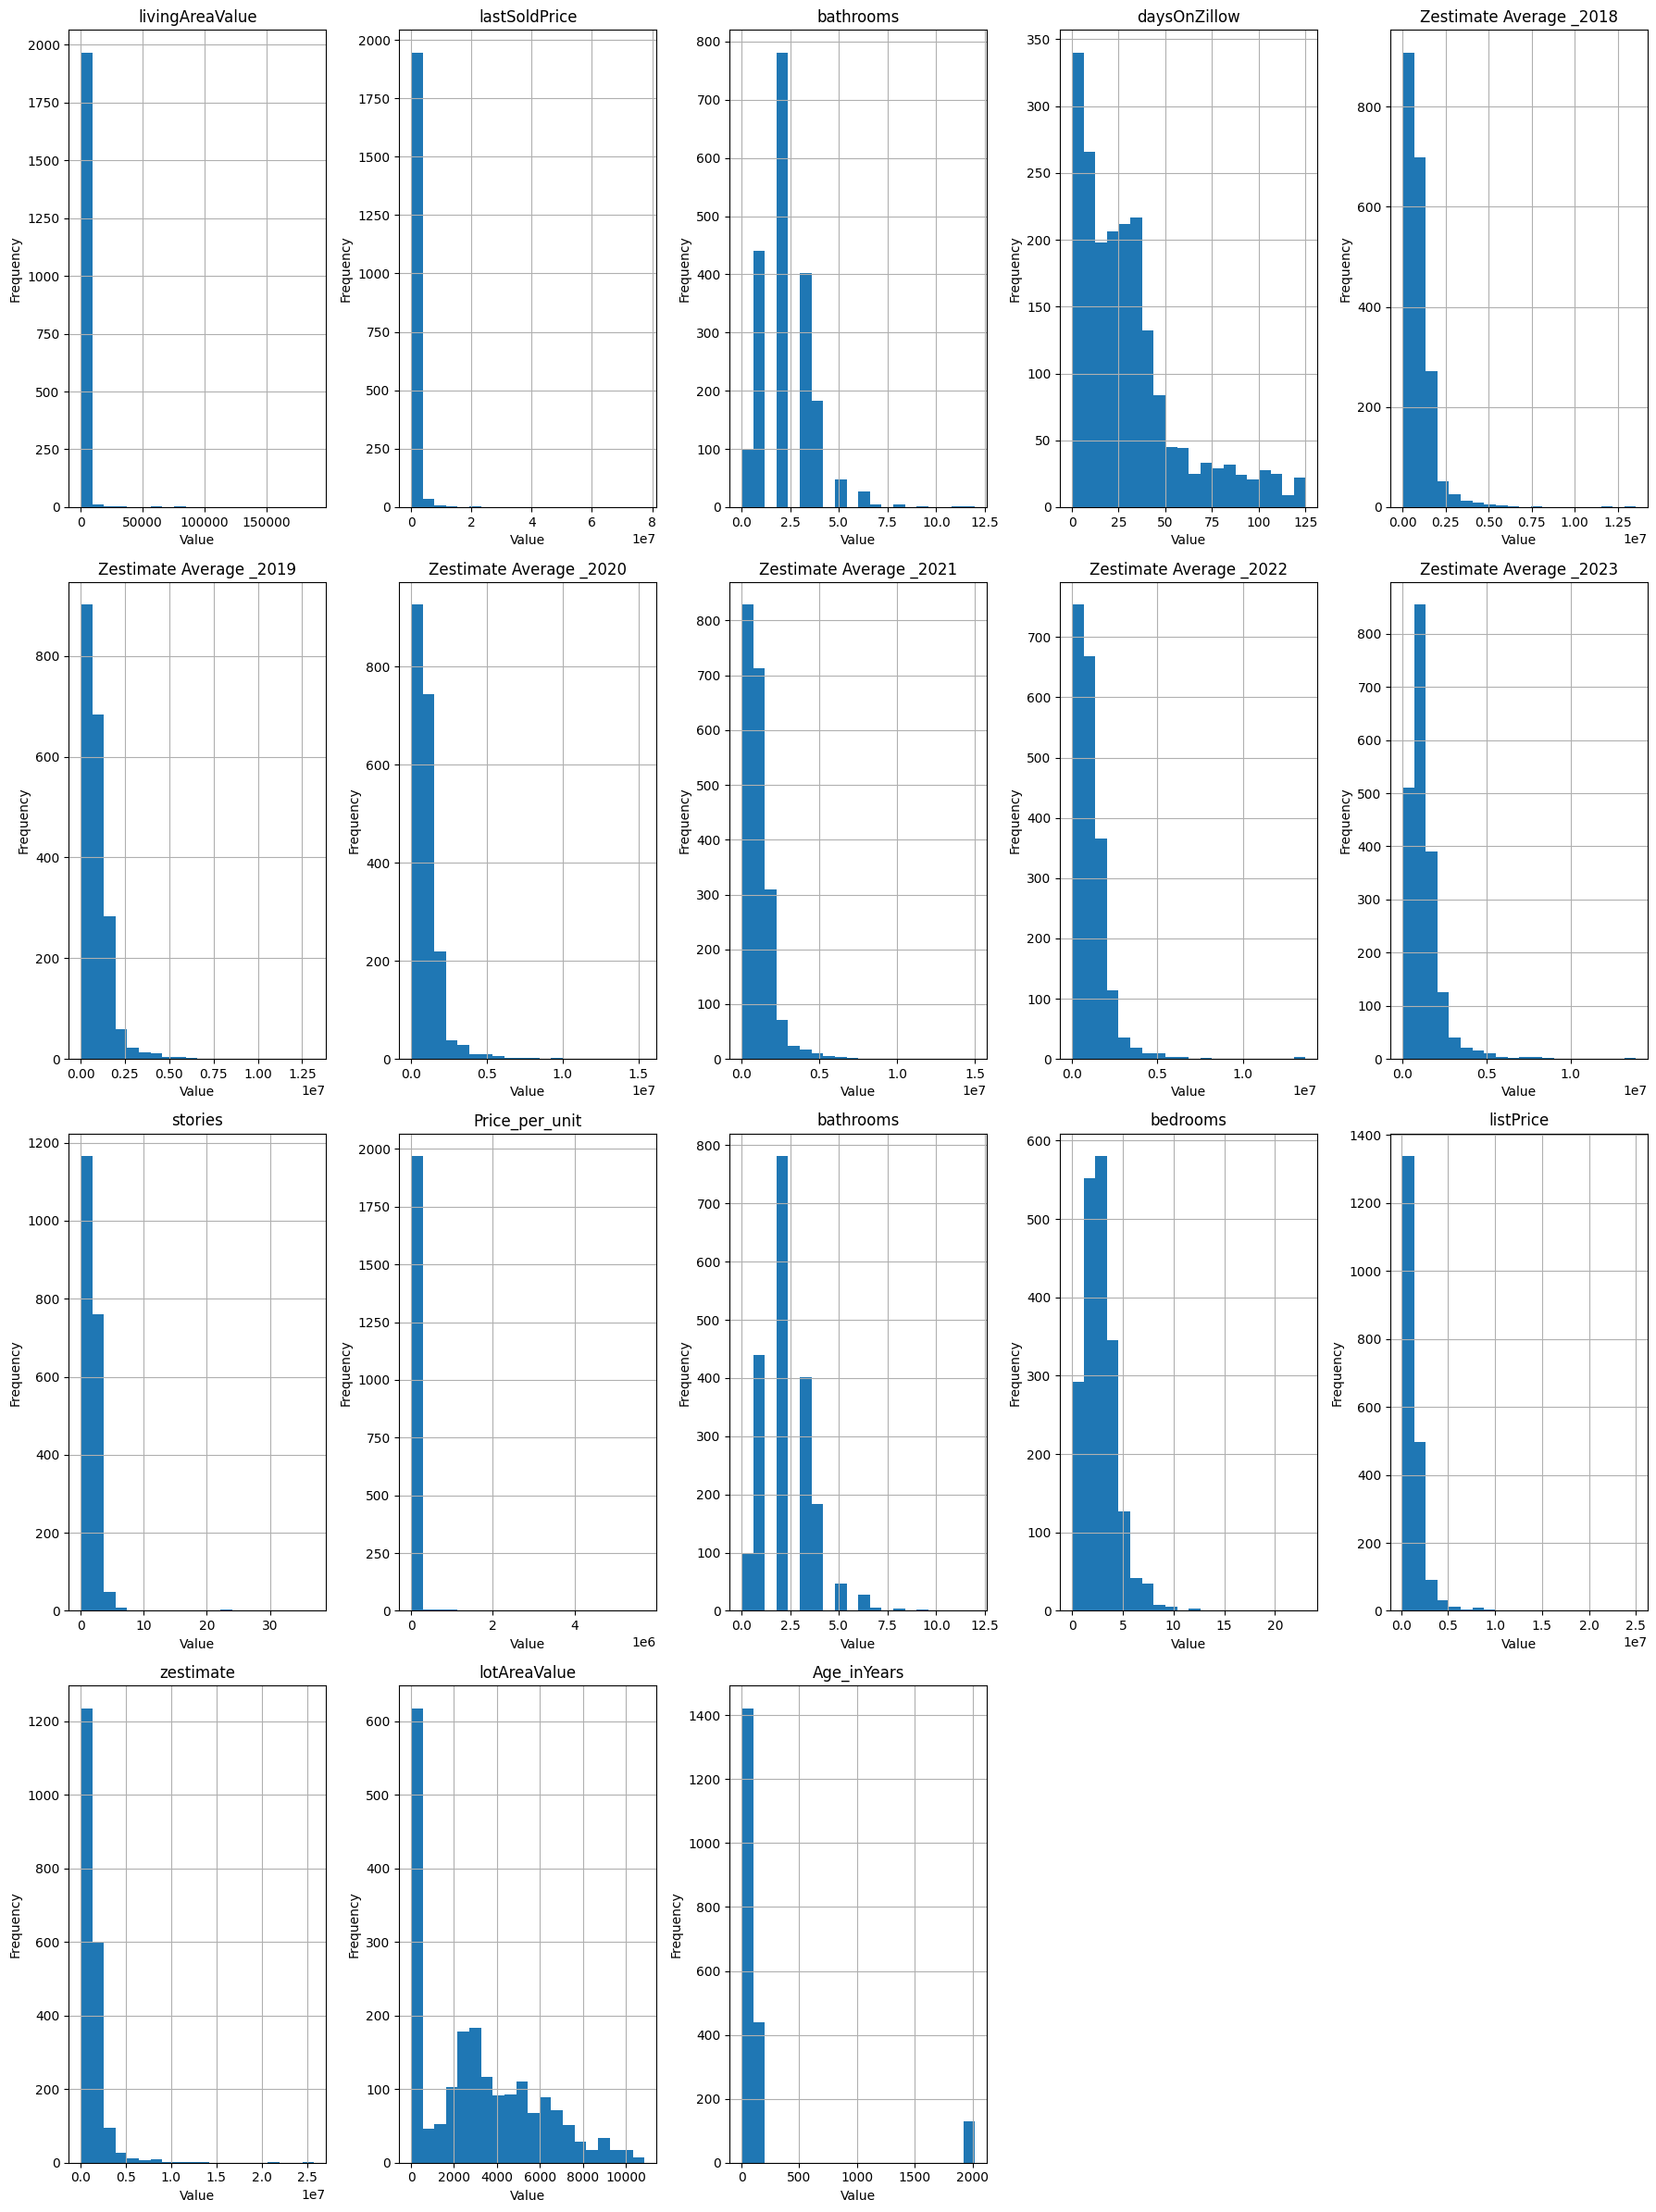

In [ ]:
#Histograms of the numerical columns
specific_numerical_columns = ['livingAreaValue','lastSoldPrice', 'bathrooms', 'daysOnZillow', 'Zestimate Average _2018',
                              'Zestimate Average _2019', 'Zestimate Average _2020', 'Zestimate Average _2021',
                              'Zestimate Average _2022', 'Zestimate Average _2023', 'stories', 'Price_per_unit', 'bathrooms', 'bedrooms', 'listPrice', 'zestimate', 'lotAreaValue', 'Age_inYears']

num_columns = 5
num_plots = len(specific_numerical_columns)
num_rows = -(-num_plots // num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows))
axes = axes.ravel()

for i, column in enumerate(specific_numerical_columns):
    dataframe[column].hist(bins=20, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(num_plots, num_rows * num_columns):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


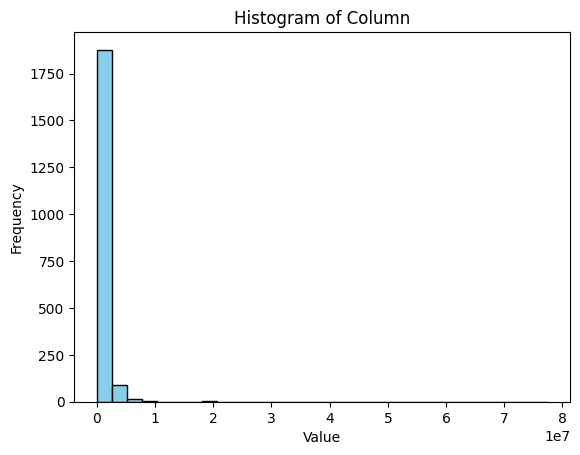

In [ ]:
plt.hist(dataframe['lastSoldPrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Calculating List Price Outliers using IQR
Q1 = dataframe['listPrice'].quantile(0.25)
Q3 = dataframe['listPrice'].quantile(0.75)
IQR = Q3 - Q1

# Determining the lower and upper bounds to detect outliers
lower_bound_LP = Q1 - 1.5 * IQR
upper_bound_LP = Q3 + 1.5 * IQR

# Identifying outliers
outliers_LP = dataframe[(dataframe['listPrice'] < lower_bound_LP) | (dataframe['listPrice'] > upper_bound_LP)]

# Displaying the outliers
print("List Price Outliers:")
outliers_LP

List Price Outliers:


zpId                   Parking        streetAddress lotAreaUnits  \
83      19682193           4 Garage spaces       1765 Hicks Ave  Square Feet   
144     19682487  2 Attached Garage spaces    1573 Camino Monde  Square Feet   
205     19593726  2 Attached Garage spaces      1770 Marina Way  Square Feet   
212     19680713  2 Attached Garage spaces      1292 Cherry Ave  Square Feet   
228     19575298           2 Garage spaces      1253 Fremont St  Square Feet   
...          ...                       ...                  ...          ...   
1563    68025864  3 Attached Garage spaces    5824 Skyline Blvd  Square Feet   
1572  2055244462                   Carport                 22nd  Square Feet   
1769    24819849  2 Attached Garage spaces           12 Neva Ct  Square Feet   
1836    54788758  6 Attached Garage spaces      13367 Campus Dr  Square Feet   
1862    24746878            1 Garage space  1166 Clarendon Cres  Square Feet   

      arm5Rate  daysOnZillow  \
83       7.543           5.0   
144      7.543           7.0   
205      7.543          12.0   
212      7.543          12.0   
228      7.543          13.0   
...        ...           ...   
1563     7.546          26.0   
1572     7.546          27.0   
1769     7.546          50.0   
1836     7.546          67.0   
1862     7.546          75.0   

                                                 hdpUrl  datePosted  \
83    /homedetails/1765-Hicks-Ave-San-Jose-CA-95125/...  2023-10-20   
144   /homedetails/1573-Camino-Monde-San-Jose-CA-951...  2023-10-18   
205   /homedetails/1770-Marina-Way-San-Jose-CA-95125...  2023-10-13   
212   /homedetails/1292-Cherry-Ave-San-Jose-CA-95125...  2023-10-13   
228   /homedetails/1253-Fremont-St-San-Jose-CA-95126...  2023-10-12   
...                                                 ...         ...   
1563  /homedetails/5824-Skyline-Blvd-Oakland-CA-9461...  2023-09-29   
1572  /homedetails/22nd-Oakland-CA-94612/2055244462_...  2023-09-28   
1769  /homedetails/12-Neva-Ct-Oakland-CA-94611/24819...  2023-09-05   
1836  /homedetails/13367-Campus-Dr-Oakland-CA-94619/...  2023-08-19   
1862  /homedetails/1166-Clarendon-Cres-Oakland-CA-94...  2023-08-11   

     isBankOwned   dateSold  ...  listPrice  thirtyYearFixedRate  zestimate  \
83         False 2000-01-01  ...  3000000.0                7.676  2967900.0   
144        False 2022-08-16  ...  3175000.0                7.676  3143900.0   
205        False 2012-08-31  ...  3299000.0                7.676  3179600.0   
212        False 2009-06-05  ...  4525000.0                7.676  4349200.0   
228        False 1993-12-03  ...  3499000.0                7.676  3368300.0   
...          ...        ...  ...        ...                  ...        ...   
1563       False 2021-06-11  ...  2995000.0                7.673  3162500.0   
1572       False 2000-01-01  ...  4400000.0                7.673        0.0   
1769       False 1998-01-30  ...  3295000.0                7.673  3224500.0   
1836       False 2000-01-01  ...  7895000.0                7.673  7493100.0   
1862       False 2000-01-01  ...  3650000.0                7.673  3462200.0   

      bedrooms isListedByOwner  lotAreaValue  fifteenYearFixedRate  \
83         4.0           False      0.723875                 7.522   
144        4.0           False   7219.000000                 7.522   
205        4.0           False   6500.000000                 7.522   
212        6.0           False      0.304959                 7.522   
228        4.0           False      0.309573                 7.522   
...        ...             ...           ...                   ...   
1563       4.0           False      0.450000                 7.521   
1572       0.0           False      0.259000                 7.521   
1769       4.0           False   6969.600000                 7.521   
1836       5.0           False      3.790000                 7.521   
1862       5.0           False      0.270000                 7.521   

      Zestimate Average

In [ ]:
# Calculating Last Sold Price Outliers using IQR
Q1 = dataframe['lastSoldPrice'].quantile(0.25)
Q3 = dataframe['lastSoldPrice'].quantile(0.75)
IQR = Q3 - Q1

# Determining the lower and upper bounds to detect outliers
lower_bound_LSP = Q1 - 1.5 * IQR
upper_bound_LSP = Q3 + 1.5 * IQR

# Identifying outliers
outliers_LSP = dataframe[(dataframe['lastSoldPrice'] < lower_bound_LSP) | (dataframe['lastSoldPrice'] > upper_bound_LSP)]

# Displaying the outliers
print("Last Sold Price Outliers:")
outliers_LSP

Last Sold Price Outliers:


zpId                   Parking        streetAddress lotAreaUnits  \
83      19682193           4 Garage spaces       1765 Hicks Ave  Square Feet   
338   2055232152           2 Garage spaces        2116 Cully Pl  Square Feet   
371    153457329  3 Attached Garage spaces     7175 Glenview Dr  Square Feet   
384   2057461496          9 Carport spaces       Graham Sanjose  Square Feet   
394     19642084  2 Attached Garage spaces      1145 Miller Ave  Square Feet   
...          ...                       ...                  ...          ...   
1487    24816331          3 Carport spaces    6630 Heartwood Dr  Square Feet   
1563    68025864  3 Attached Garage spaces    5824 Skyline Blvd  Square Feet   
1572  2055244462                   Carport                 22nd  Square Feet   
1836    54788758  6 Attached Garage spaces      13367 Campus Dr  Square Feet   
1862    24746878            1 Garage space  1166 Clarendon Cres  Square Feet   

      arm5Rate  daysOnZillow  \
83       7.543           5.0   
338      7.543          26.0   
371      7.543          29.0   
384      7.543          33.0   
394      7.543          35.0   
...        ...           ...   
1487     7.546          19.0   
1563     7.546          26.0   
1572     7.546          27.0   
1836     7.546          67.0   
1862     7.546          75.0   

                                                 hdpUrl  datePosted  \
83    /homedetails/1765-Hicks-Ave-San-Jose-CA-95125/...  2023-10-20   
338   /homedetails/2116-Cully-Pl-San-Jose-CA-95124/2...  2023-09-29   
371   /homedetails/7175-Glenview-Dr-San-Jose-CA-9512...  2023-09-26   
384   /homedetails/Graham-Sanjose-San-Jose-CA-95110/...  2023-09-21   
394   /homedetails/1145-Miller-Ave-San-Jose-CA-95129...  2023-09-20   
...                                                 ...         ...   
1487  /homedetails/6630-Heartwood-Dr-Oakland-CA-9461...  2023-10-06   
1563  /homedetails/5824-Skyline-Blvd-Oakland-CA-9461...  2023-09-29   
1572  /homedetails/22nd-Oakland-CA-94612/2055244462_...  2023-09-28   
1836  /homedetails/13367-Campus-Dr-Oakland-CA-94619/...  2023-08-19   
1862  /homedetails/1166-Clarendon-Cres-Oakland-CA-94...  2023-08-11   

     isBankOwned   dateSold  ...  listPrice  thirtyYearFixedRate  zestimate  \
83         False 2000-01-01  ...  3000000.0                7.676  2967900.0   
338        False 2000-01-01  ...  3260000.0                7.676  3260000.0   
371        False 2021-07-14  ...  4699000.0                7.676  4533700.0   
384        False 2000-01-01  ...  4600000.0                7.676        0.0   
394        False 2000-01-01  ...  2798000.0                7.676  2642000.0   
...          ...        ...  ...        ...                  ...        ...   
1487       False 2000-01-01  ...  3000000.0                7.673  3270000.0   
1563       False 2021-06-11  ...  2995000.0                7.673  3162500.0   
1572       False 2000-01-01  ...  4400000.0                7.673        0.0   
1836       False 2000-01-01  ...  7895000.0                7.673  7493100.0   
1862       False 2000-01-01  ...  3650000.0                7.673  3462200.0   

      bedrooms isListedByOwner  lotAreaValue  fifteenYearFixedRate  \
83         4.0           False      0.723875                 7.522   
338        4.0           False   5440.000000                 7.522   
371        5.0           False      0.785200                 7.522   
384        0.0           False      0.321000                 7.522   
394        5.0           False   6746.000000                 7.522   
...        ...             ...           ...                   ...   
1487       4.0           False      0.290000                 7.521   
1563       4.0           False      0.450000                 7.521   
1572       0.0           False      0.259000                 7.521   
1836       5.0           False      3.790000                 7.521   
1862       5.0           False      0.270000                 7.521   

      Zestimate Average

In [ ]:
# Calculating Zestimate Outliers using IQR
Q1 = dataframe['zestimate'].quantile(0.25)
Q3 = dataframe['zestimate'].quantile(0.75)
IQR = Q3 - Q1

# Determining the lower and upper bounds to detect outliers
lower_bound_ZS = Q1 - 1.5 * IQR
upper_bound_ZS = Q3 + 1.5 * IQR

# Identifying outliers
outliers_ZS = dataframe[(dataframe['zestimate'] < lower_bound_ZS) | (dataframe['zestimate'] > upper_bound_ZS)]

# Displaying the outliers
print("Zestimate Outliers:")
outliers_ZS

Zestimate Outliers:


zpId                   Parking        streetAddress lotAreaUnits  \
83    19682193           4 Garage spaces       1765 Hicks Ave  Square Feet   
144   19682487  2 Attached Garage spaces    1573 Camino Monde  Square Feet   
205   19593726  2 Attached Garage spaces      1770 Marina Way  Square Feet   
212   19680713  2 Attached Garage spaces      1292 Cherry Ave  Square Feet   
228   19575298           2 Garage spaces      1253 Fremont St  Square Feet   
...        ...                       ...                  ...          ...   
1487  24816331          3 Carport spaces    6630 Heartwood Dr  Square Feet   
1563  68025864  3 Attached Garage spaces    5824 Skyline Blvd  Square Feet   
1769  24819849  2 Attached Garage spaces           12 Neva Ct  Square Feet   
1836  54788758  6 Attached Garage spaces      13367 Campus Dr  Square Feet   
1862  24746878            1 Garage space  1166 Clarendon Cres  Square Feet   

      arm5Rate  daysOnZillow  \
83       7.543           5.0   
144      7.543           7.0   
205      7.543          12.0   
212      7.543          12.0   
228      7.543          13.0   
...        ...           ...   
1487     7.546          19.0   
1563     7.546          26.0   
1769     7.546          50.0   
1836     7.546          67.0   
1862     7.546          75.0   

                                                 hdpUrl  datePosted  \
83    /homedetails/1765-Hicks-Ave-San-Jose-CA-95125/...  2023-10-20   
144   /homedetails/1573-Camino-Monde-San-Jose-CA-951...  2023-10-18   
205   /homedetails/1770-Marina-Way-San-Jose-CA-95125...  2023-10-13   
212   /homedetails/1292-Cherry-Ave-San-Jose-CA-95125...  2023-10-13   
228   /homedetails/1253-Fremont-St-San-Jose-CA-95126...  2023-10-12   
...                                                 ...         ...   
1487  /homedetails/6630-Heartwood-Dr-Oakland-CA-9461...  2023-10-06   
1563  /homedetails/5824-Skyline-Blvd-Oakland-CA-9461...  2023-09-29   
1769  /homedetails/12-Neva-Ct-Oakland-CA-94611/24819...  2023-09-05   
1836  /homedetails/13367-Campus-Dr-Oakland-CA-94619/...  2023-08-19   
1862  /homedetails/1166-Clarendon-Cres-Oakland-CA-94...  2023-08-11   

     isBankOwned   dateSold  ...  listPrice  thirtyYearFixedRate  zestimate  \
83         False 2000-01-01  ...  3000000.0                7.676  2967900.0   
144        False 2022-08-16  ...  3175000.0                7.676  3143900.0   
205        False 2012-08-31  ...  3299000.0                7.676  3179600.0   
212        False 2009-06-05  ...  4525000.0                7.676  4349200.0   
228        False 1993-12-03  ...  3499000.0                7.676  3368300.0   
...          ...        ...  ...        ...                  ...        ...   
1487       False 2000-01-01  ...  3000000.0                7.673  3270000.0   
1563       False 2021-06-11  ...  2995000.0                7.673  3162500.0   
1769       False 1998-01-30  ...  3295000.0                7.673  3224500.0   
1836       False 2000-01-01  ...  7895000.0                7.673  7493100.0   
1862       False 2000-01-01  ...  3650000.0                7.673  3462200.0   

      bedrooms isListedByOwner  lotAreaValue  fifteenYearFixedRate  \
83         4.0           False      0.723875                 7.522   
144        4.0           False   7219.000000                 7.522   
205        4.0           False   6500.000000                 7.522   
212        6.0           False      0.304959                 7.522   
228        4.0           False      0.309573                 7.522   
...        ...             ...           ...                   ...   
1487       4.0           False      0.290000                 7.521   
1563       4.0           False      0.450000                 7.521   
1769       4.0           False   6969.600000                 7.521   
1836       5.0           False      3.790000                 7.521   
1862       5.0           False      0.270000                 7.521   

      Zestimate Average _2022       homeType 

In [ ]:
# Calculating Living Area Value Outliers using IQR
Q1 = dataframe['livingAreaValue'].quantile(0.25)
Q3 = dataframe['livingAreaValue'].quantile(0.75)
IQR = Q3 - Q1

# Determining the lower and upper bounds to detect outliers
lower_bound_LAV = Q1 - 1.5 * IQR
upper_bound_LAV = Q3 + 1.5 * IQR

# Identifying outliers
outliers_LAV = dataframe[(dataframe['livingAreaValue'] < lower_bound_LAV) | (dataframe['livingAreaValue'] > upper_bound_LAV)]

# Displaying the outliers
print("Living Area Value Outliers:")
outliers_LAV['livingAreaValue']

Living Area Value Outliers:


59      15031.0
165      3906.0
212      5248.0
228      3931.0
274      4752.0
         ...   
1941     9045.0
1954     4172.0
1960    29081.0
1979    17639.0
1987     4491.0
Name: livingAreaValue, Length: 125, dtype: float64

In [ ]:
# Calculating Lot Area Value Outliers using IQR
Q1 = dataframe['lotAreaValue'].quantile(0.25)
Q3 = dataframe['lotAreaValue'].quantile(0.75)
IQR = Q3 - Q1

# Determining the lower and upper bounds to detect outliers
lower_bound_LotAV = Q1 - 1.5 * IQR
upper_bound_LotAV = Q3 + 1.5 * IQR

# Identifying outliers
outliers_LotAV = dataframe[(dataframe['lotAreaValue'] < lower_bound_LotAV) | (dataframe['lotAreaValue'] > upper_bound_LotAV)]

# Displaying the outliers
print("Lot Area Value Outliers:")
outliers_LotAV

Lot Area Value Outliers:


Empty DataFrame
Columns: [zpId, Parking, streetAddress, lotAreaUnits, arm5Rate, daysOnZillow, hdpUrl, datePosted, isBankOwned, dateSold, zipcode, lastSoldPrice, livingAreaValue, Zestimate Average _2018, description, stories, Zestimate Average _2023, latitude, Zestimate Average _2021, isZillowOwned, Price_per_unit, wasForeclosed, Year Built, Zestimate Average _2019, city, Zestimate Average _2020, longitude, state, county, address, bathrooms, listPrice, thirtyYearFixedRate, zestimate, bedrooms, isListedByOwner, lotAreaValue, fifteenYearFixedRate, Zestimate Average _2022, homeType, Age_inYears]
Index: []

[0 rows x 41 columns]

Lot Area does not have any outliers

In [ ]:
# Calculating Price per Squarefeet Outliers using IQR
Q1 = dataframe['Price_per_unit'].quantile(0.25)
Q3 = dataframe['Price_per_unit'].quantile(0.75)
IQR = Q3 - Q1

# Determining the lower and upper bounds to detect outliers
lower_bound_pps = Q1 - 1.5 * IQR
upper_bound_pps = Q3 + 1.5 * IQR

# Identifying outliers
outliers_pps = dataframe[(dataframe['Price_per_unit'] < lower_bound_pps) | (dataframe['Price_per_unit'] > upper_bound_pps)]

# Displaying the outliers
print("Price per unit Value Outliers:")
outliers_pps

Price per unit Value Outliers:


zpId                   Parking          streetAddress  \
59      19776449   No Information Provided  1073 Vista Del Mar Dr   
79    2063211950   No Information Provided           1 Boulder Dr   
85      19686778   1 Attached Garage space          2081 Ardis Dr   
104    243210305   No Information Provided          0 Claitor Way   
467   2055630092  2 Attached Garage spaces      1141 Saratoga Ave   
...          ...                       ...                    ...   
1831  2055308248   No Information Provided          41 Keller Ave   
1880  2093398899   No Information Provided            2 Turner Ct   
1891  2076356607   No Information Provided        0 Cliffland Ave   
1960   249986219   No Information Provided            Outlook Ave   
1979  2086854676   No Information Provided          0 Fontaine St   

     lotAreaUnits  arm5Rate  daysOnZillow  \
59    Square Feet     7.291           3.0   
79    Square Feet     7.349           5.0   
85    Square Feet     7.543           5.0   
104   Square Feet     7.349           6.0   
467   Square Feet     7.546          48.0   
...           ...       ...           ...   
1831  Square Feet     6.625          64.0   
1880  Square Feet     7.283          80.0   
1891  Square Feet     7.283          84.0   
1960  Square Feet     7.359         110.0   
1979  Square Feet     6.625         121.0   

                                                 hdpUrl  datePosted  \
59    /homedetails/1073-Vista-Del-Mar-Dr-San-Jose-CA...  2023-10-22   
79    /homedetails/1-Boulder-Dr-San-Jose-CA-95132/20...  2023-10-20   
85    /homedetails/2081-Ardis-Dr-San-Jose-CA-95125/1...  2023-10-20   
104   /homedetails/0-Claitor-Way-San-Jose-CA-95132/2...  2023-10-19   
467   /homedetails/1141-Saratoga-Ave-San-Jose-CA-951...  2023-09-07   
...                                                 ...         ...   
1831  /homedetails/41-Keller-Ave-Oakland-CA-94605/20...  2023-08-22   
1880  /homedetails/2-Turner-Ct-Oakland-CA-94605/2093...  2023-08-06   
1891  /homedetails/0-Cliffland-Ave-Oakland-CA-94605/...  2023-08-02   
1960  /homedetails/Outlook-Ave-Oakland-CA-94608/2499...  2023-07-07   
1979  /homedetails/0-Fontaine-St-Oakland-CA-94605/20...  2023-06-26   

     isBankOwned   dateSold  ...  listPrice  thirtyYearFixedRate  zestimate  \
59         False 2021-06-15  ...   800000.0                7.641        0.0   
79         False 2000-01-01  ...   350000.0                7.771        0.0   
85         False 2015-06-22  ...  1498800.0                7.676  1507400.0   
104        False 2018-04-03  ...   378000.0                7.771        0.0   
467        False 2000-01-01  ...  5000000.0                7.673  5059100.0   
...          ...        ...  ...        ...                  ...        ...   
1831       False 2000-01-01  ...   249000.0                7.491        0.0   
1880       False 2000-01-01  ...   595000.0                7.646        0.0   
1891       False 2000-01-01  ...   570000.0                7.646        0.0   
1960       False 2000-01-01  ...   349900.0                7.807        0.0   
1979       False 2000-01-01  ...   199000.0                7.491        0.0   

      bedrooms isListedByOwner  lotAreaValue  fifteenYearFixedRate  \
59         0.0           False      0.350000                 6.936   
79         0.0           False      0.380000                 6.874   
85         2.0           False   5414.000000                 7.522   
104        0.0           False      0.391781                 6.874   
467        3.0           False   6681.000000                 7.521   
...        ...             ...           ...                   ...   
1831       0.0           False      0.260000                 6.796   
1880       0.0           False      0.605716                 6.937   
1891       0.0           False      0.739500                 6.937   
1960       0.0           False      0.660000                 6.867   
1979       0.0           False      0.410000                 6.796   


Each record in the data represent details of a particular house with its unique properties and characteristics and outliers could signify genuine and valuable information. Outliers might represent luxury properties, unique houses, or other exceptional cases that genuinely exist but are less common. Removing such outliers could result in the loss of essential information and potentially impact the performance of the model. Moreover, in real estate markets, there can be significant price variations due to various factors like location, amenities, or unique features, leading to outliers in the data. Hence removing these outliers is not a viable option

<ipython-input-90-52db0e5e6b65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


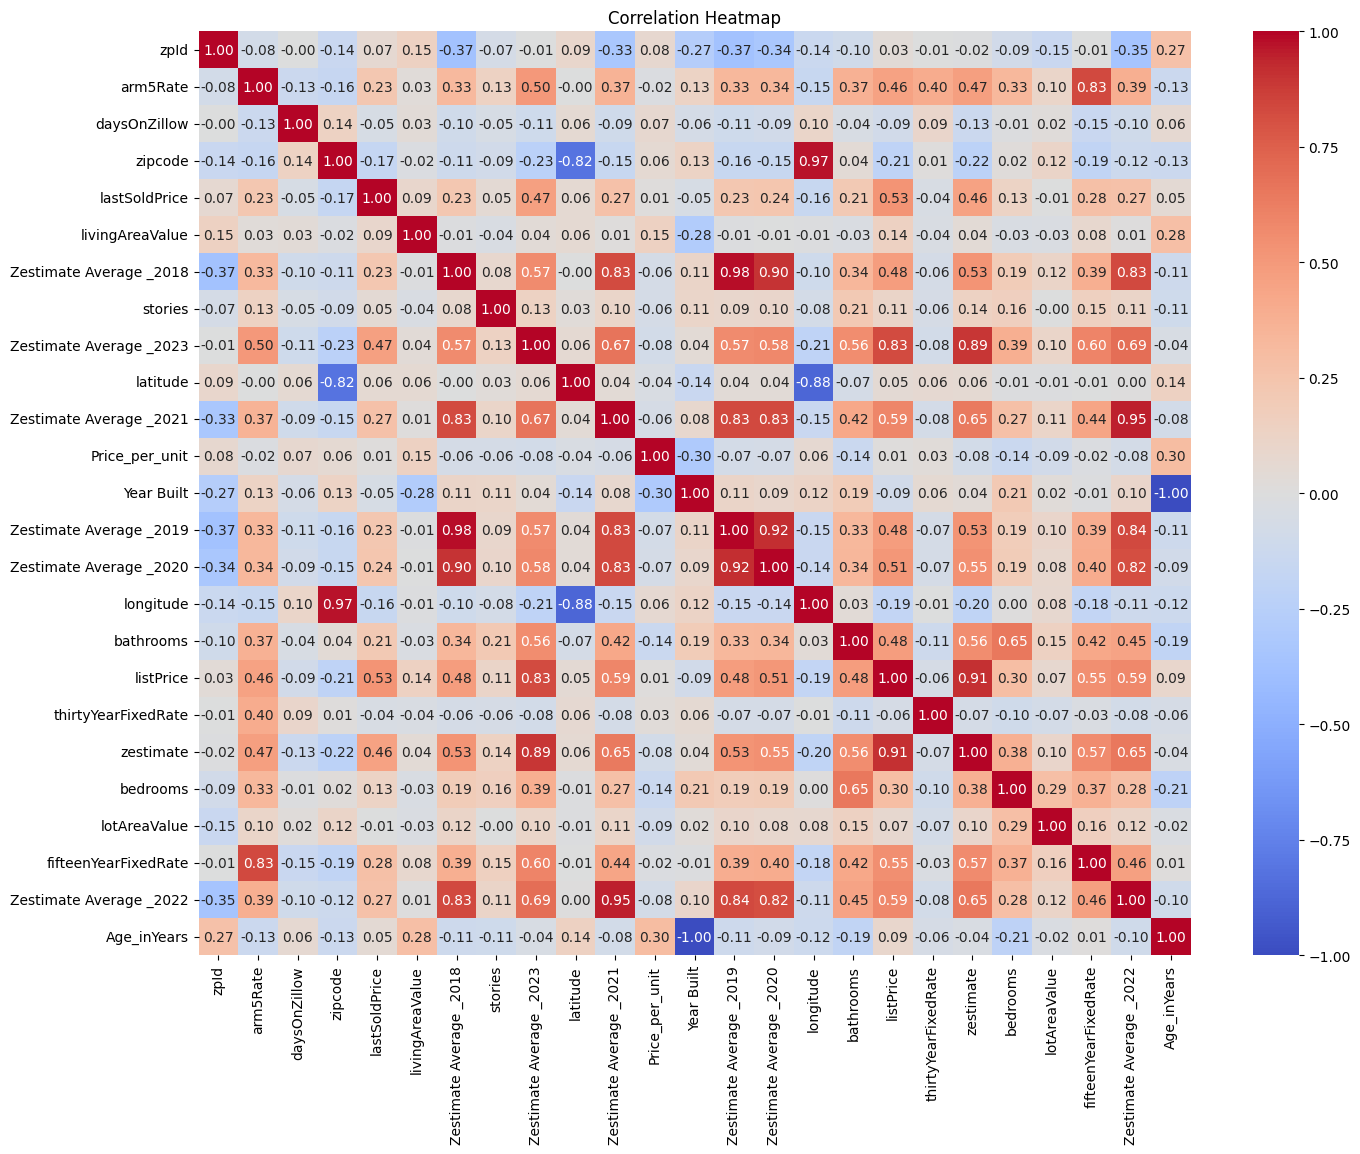

In [ ]:
#Computing Correlation Matrix
correlation_matrix = dataframe.corr()

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   zpId                     1992 non-null   int64         
 1   Parking                  1992 non-null   object        
 2   streetAddress            1992 non-null   object        
 3   lotAreaUnits             1992 non-null   object        
 4   arm5Rate                 1992 non-null   float64       
 5   daysOnZillow             1992 non-null   float64       
 6   hdpUrl                   1992 non-null   object        
 7   datePosted               1992 non-null   object        
 8   isBankOwned              1992 non-null   object        
 9   dateSold                 1992 non-null   datetime64[ns]
 10  zipcode                  1992 non-null   float64       
 11  lastSoldPrice            1992 non-null   float64       
 12  livingAreaValue          1992 non-

This chart indicates the geographical locations of listing across the three cities

In [ ]:
#Distribution of data points across cities

# Calculate the center of the map based on the mean latitude and longitude
center_lat = dataframe['latitude'].mean()
center_lon = dataframe['longitude'].mean()

# Create a Folium map centered at the calculated location
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Get unique cities from the DataFrame
unique_cities = dataframe['city'].unique()

# Define a list of colors for each city (you can customize this list as needed)
city_colors = ['blue', 'green', 'red', 'orange']

# Create a color mapping dictionary based on unique cities
color_mapping = {city: color for city, color in zip(unique_cities, city_colors)}

for index, row in dataframe.iterrows():
    details = f"Price: ${row['listPrice']} | Bedrooms: {row['bedrooms']} | Bathrooms: {row['bathrooms']}"

    # Get the city for the current row
    city = row['city']

    # Get the color associated with the city
    color = color_mapping.get(city, 'gray')  # Default to gray if city not found in the mapping

    folium.Marker([row['latitude'], row['longitude']], popup=details, icon=folium.Icon(color=color)).add_to(m)

m

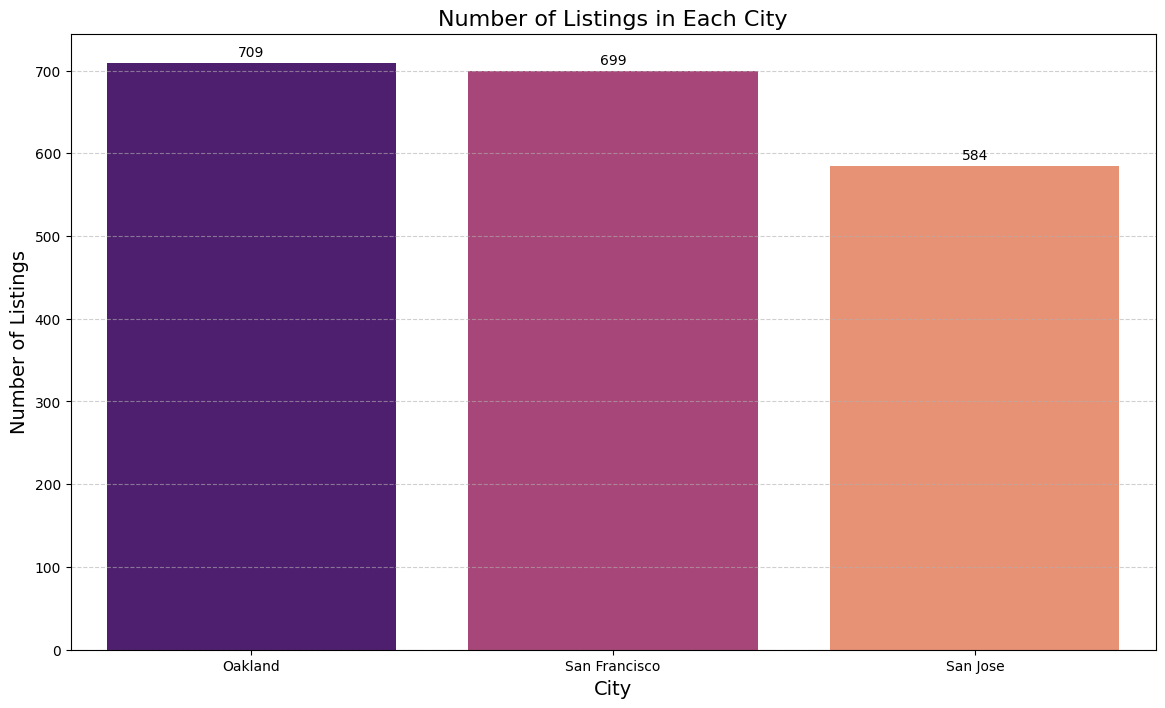

In [ ]:
# Cities with the highest number of listings for sale
city_record_counts = dataframe['city'].value_counts()

# Sort the cities by count in descending order
sorted_cities = city_record_counts.sort_values(ascending=False)

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 8))

# Use seaborn's barplot with a different color palette
sns.barplot(x=sorted_cities.index, y=sorted_cities.values, palette='magma')

# Add labels and title
plt.title('Number of Listings in Each City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)

# Annotate the bar plot with the exact counts
for i, value in enumerate(sorted_cities.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
#Proportions of Home Type
home_type_proportions = dataframe['homeType'].value_counts().reset_index()
home_type_proportions.columns = ['Home Type', 'Count']

fig = px.pie(home_type_proportions, values='Count', names='Home Type', title='Proportions of Home Types')
fig.show()


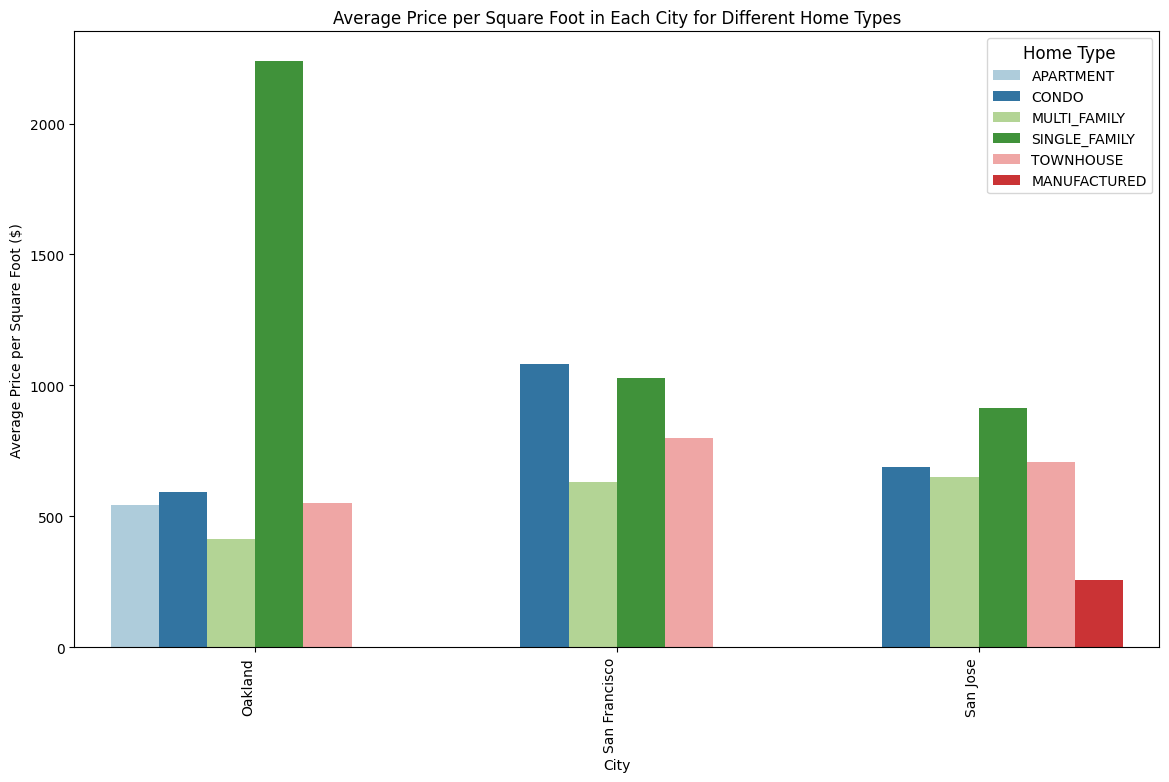

In [ ]:
#Computing Average Price per square foot in each city for different home tyoes

# Filter the dataset to include only records with lot area units as square feet and exclude 'LOT' home type
filtered_data = dataframe[(dataframe['lotAreaUnits'] == 'Square Feet') & (dataframe['homeType'] != 'LOT')]

# Group the filtered data by city and home type and calculate the average price per square foot
grouped_data = filtered_data.groupby(['city', 'homeType'])['Price_per_unit'].mean().reset_index()

# Get the sorted order of cities
sorted_cities = grouped_data['city'].unique()
sorted_cities.sort()

plt.figure(figsize=(14, 8))
sns.barplot(x='city', y='Price_per_unit', hue='homeType', data=grouped_data, palette='Paired')
plt.title('Average Price per Square Foot in Each City for Different Home Types')
plt.xlabel('City')
plt.ylabel('Average Price per Square Foot ($)')
plt.xticks(rotation=90,ha='right')
plt.legend(title='Home Type', title_fontsize='12', loc='upper right')

plt.show()


In [ ]:
#Computing the count of Oldest and Newest Properties

sorted_df = dataframe.sort_values('Year Built', ascending=False)

# Calculate the age of properties
current_year = 2023  # Change this to the current year if needed
sorted_df['Property Age'] = current_year - sorted_df['Year Built']

# Filter out properties with an age less than 25 years (Oldest Properties)
recent_properties = sorted_df[sorted_df['Property Age'] < 25]
oldest_properties_top10 = recent_properties['city'].value_counts().nlargest(10)

# Filter out properties with an age less than 5 years (Newest Properties)
newest_properties = sorted_df[sorted_df['Property Age'] < 5]
newest_properties_count = newest_properties['city'].value_counts().reset_index()
newest_properties_count.columns = ['City', 'Count']

# Create a bar chart for both oldest and newest properties
fig = px.bar()

# Adding trace for Oldest Properties
fig.add_bar(x=oldest_properties_top10.values, y=oldest_properties_top10.index,
            orientation='h', text=oldest_properties_top10.values,
            name='Oldest Properties (Properties Older than 25 Years)',
            marker=dict(color='gold'))  # Set the color for oldest properties (dark goldenrod)

# Adding trace for Newest Properties
fig.add_bar(x=newest_properties_count['Count'], y=newest_properties_count['City'],
            orientation='h', text=newest_properties_count['Count'],
            name='Newest Properties (Properties Younger than 5 Years)',
            marker=dict(color='darkorange'))  # Set the color for newest properties (dark orange)

# Set layout and show the chart with increased size
fig.update_layout(title='Count of Oldest and Newest Properties in Each City',
                  xaxis_title='Count', yaxis_title='City', height=500, width=1100)
fig.update_traces(textposition='outside')
fig.show()


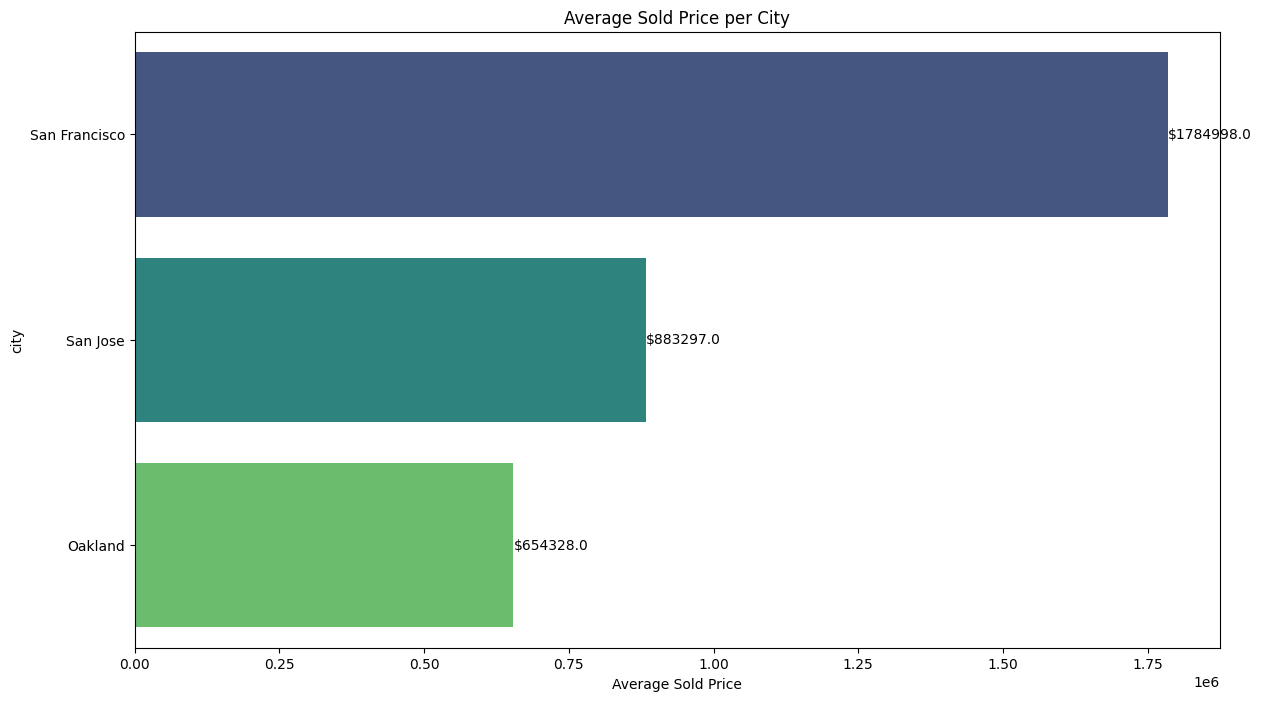

In [ ]:
#Average Sold Price per City

# Group data by city and calculate the mean list price
avg_list_price = dataframe.groupby('city')['lastSoldPrice'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='lastSoldPrice', y='city', data=avg_list_price, palette='viridis')
plt.xlabel('Average Sold Price')
plt.title('Average Sold Price per City')

# Display rounded values to 0 decimal points on the bars in bold
for index, value in enumerate(avg_list_price['lastSoldPrice']):
    value = round(value, 0)
    ax.text(value, index, f'${value}', ha='left', va='center')

plt.show()


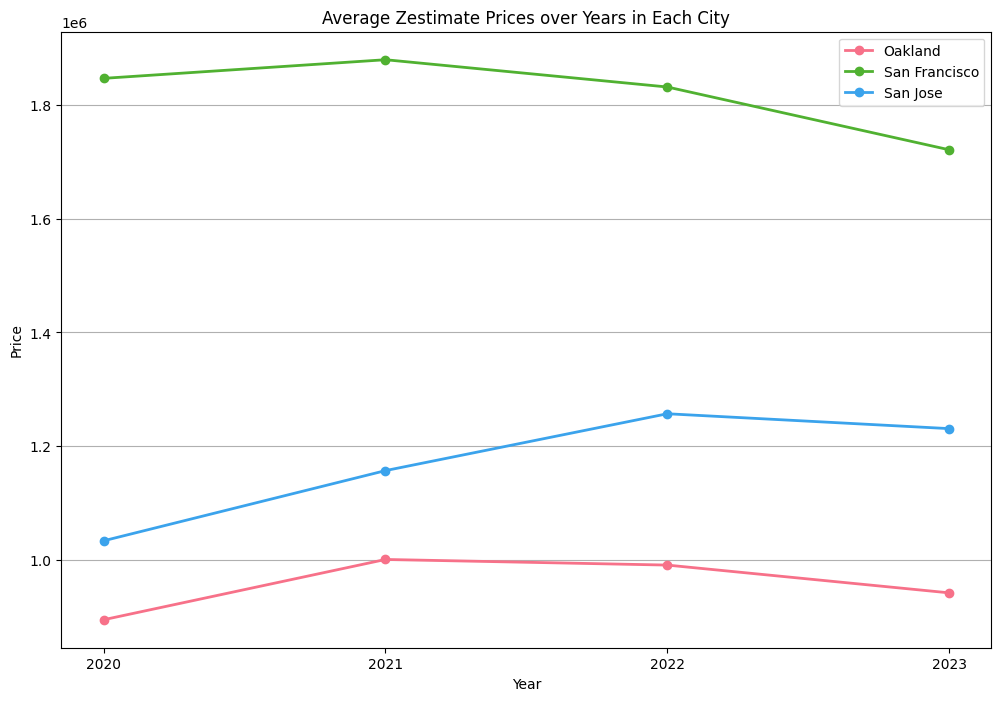

In [ ]:
#Average Zestimate Prices over years in each city
grouped = dataframe.groupby('city')

# Define years and corresponding columns
years = range(2020, 2024)  # Changed to include up to 2023
zestimate_columns = [f'Zestimate Average _{year}' for year in years]

# Define a color palette for each city
city_palette = sns.color_palette("husl", n_colors=len(grouped))

# Plot a line chart for each city with non-zero Zestimate values
plt.figure(figsize=(12, 8))

for (city, city_data), color in zip(grouped, city_palette):
    zestimate_data = city_data[zestimate_columns]
    non_zero_mask = zestimate_data.ne(0).all(axis=1)
    zestimate_data = zestimate_data[non_zero_mask]

    if not zestimate_data.empty:
        avg_prices = zestimate_data.mean()
        plt.plot(years, avg_prices, label=city, marker='o', color=color, linewidth=2)

plt.title('Average Zestimate Prices over Years in Each City')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(years)
plt.legend()
plt.grid(axis='y')
plt.show()


<ipython-input-99-c85ca0524e84>:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



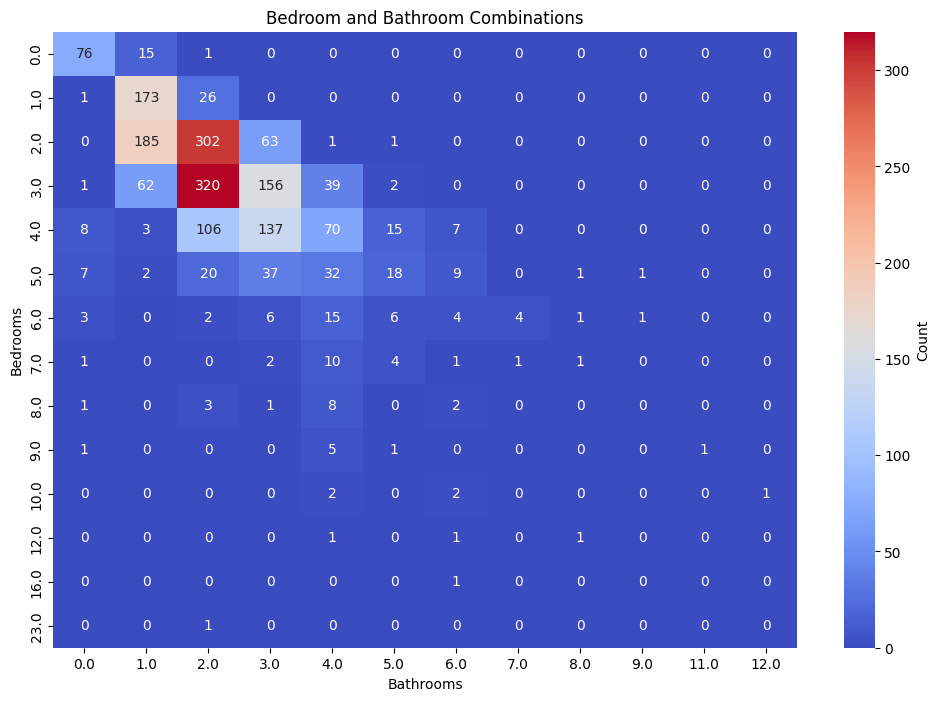

In [ ]:
#Computing most listed bedroom bathroom combination

combination_count = dataframe.groupby(['bedrooms', 'bathrooms']).size().reset_index(name='Count')

heatmap_data = combination_count.pivot('bedrooms', 'bathrooms', 'Count').fillna(0)


plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='g', cbar_kws={'label': 'Count'})
plt.title('Bedroom and Bathroom Combinations')
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.show()

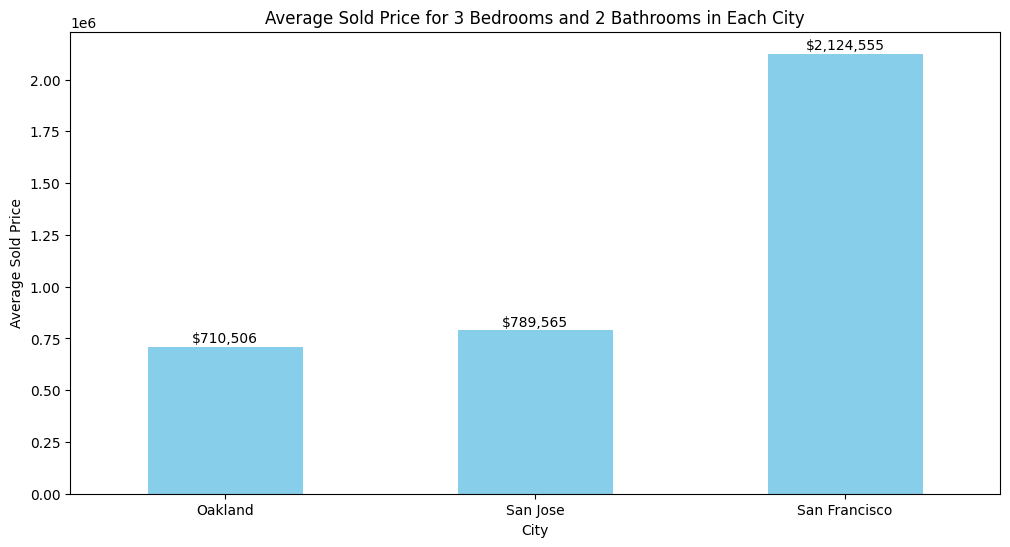

In [ ]:
#Average Price in each city for Most Common Bedroom, Bathroom Combination
specific_combination = (3, 2)

# Filter the data for the specified bedroom and bathroom combination
specific_data = dataframe[(dataframe['bedrooms'] == specific_combination[0]) & (dataframe['bathrooms'] == specific_combination[1])]

# Group the filtered data by city and calculate the average list price
average_list_price = specific_data.groupby('city')['lastSoldPrice'].mean().sort_values()

# Plot the average list prices for the specified combination in each city
plt.figure(figsize=(12, 6))
bars = average_list_price.plot(kind='bar', color='skyblue')
plt.title(f'Average Sold Price for {specific_combination[0]} Bedrooms and {specific_combination[1]} Bathrooms in Each City')
plt.xlabel('City')
plt.ylabel('Average Sold Price')
plt.xticks(rotation=0)

# Add annotations (values) on top of each bar
for i, v in enumerate(average_list_price):
    bars.text(i, v + 5000, f"${v:,.0f}", ha='center', va='bottom', color='black', fontsize=10)

plt.show()


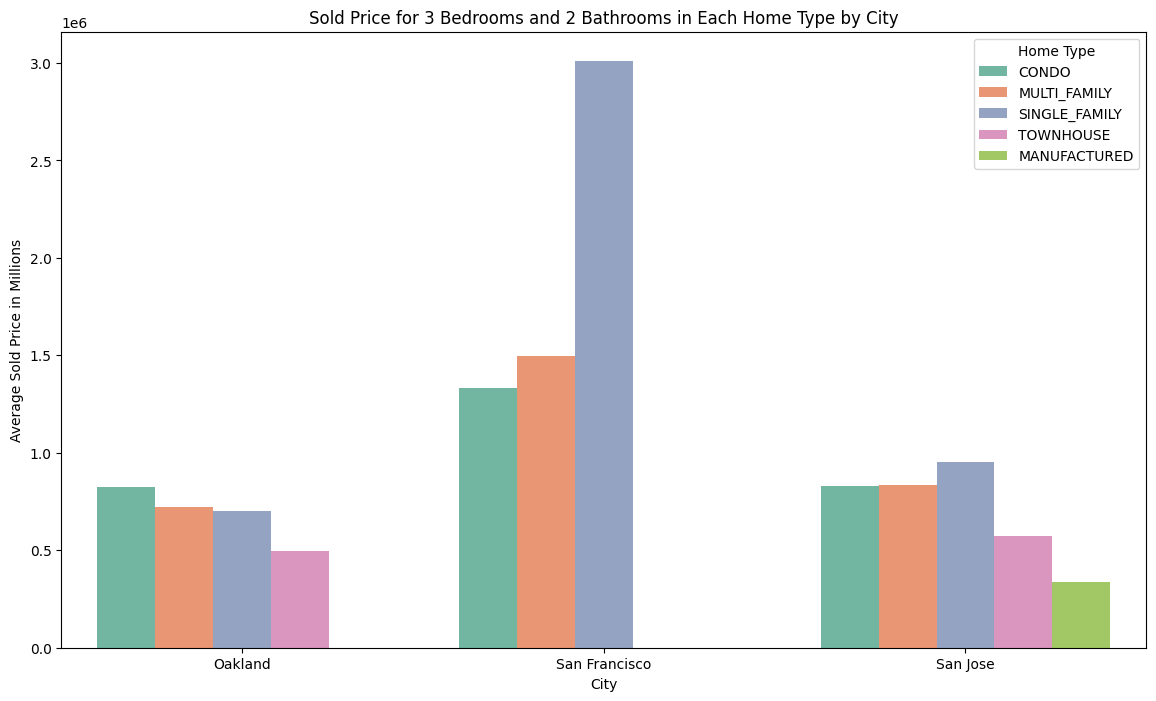

In [ ]:
# Sold Price for most common bedroom bathroom combination on basis of HomeType
specific_combination = (3, 2)

specific_data = dataframe[(dataframe['bedrooms'] == specific_combination[0]) & (dataframe['bathrooms'] == specific_combination[1])]

# Group the filtered data by city and homeType and calculate the average list price
average_sold_price = specific_data.groupby(['city', 'homeType'])['lastSoldPrice'].mean().reset_index()

color_palette = 'Set2'
plt.figure(figsize=(14, 8))
sns.barplot(x='city', y='lastSoldPrice', hue='homeType', data=average_sold_price, palette=color_palette)
plt.title(f'Sold Price for {specific_combination[0]} Bedrooms and {specific_combination[1]} Bathrooms in Each Home Type by City')
plt.xlabel('City')
plt.ylabel('Average Sold Price in Millions')
plt.xticks(rotation=0)
plt.legend(title='Home Type')
plt.show()


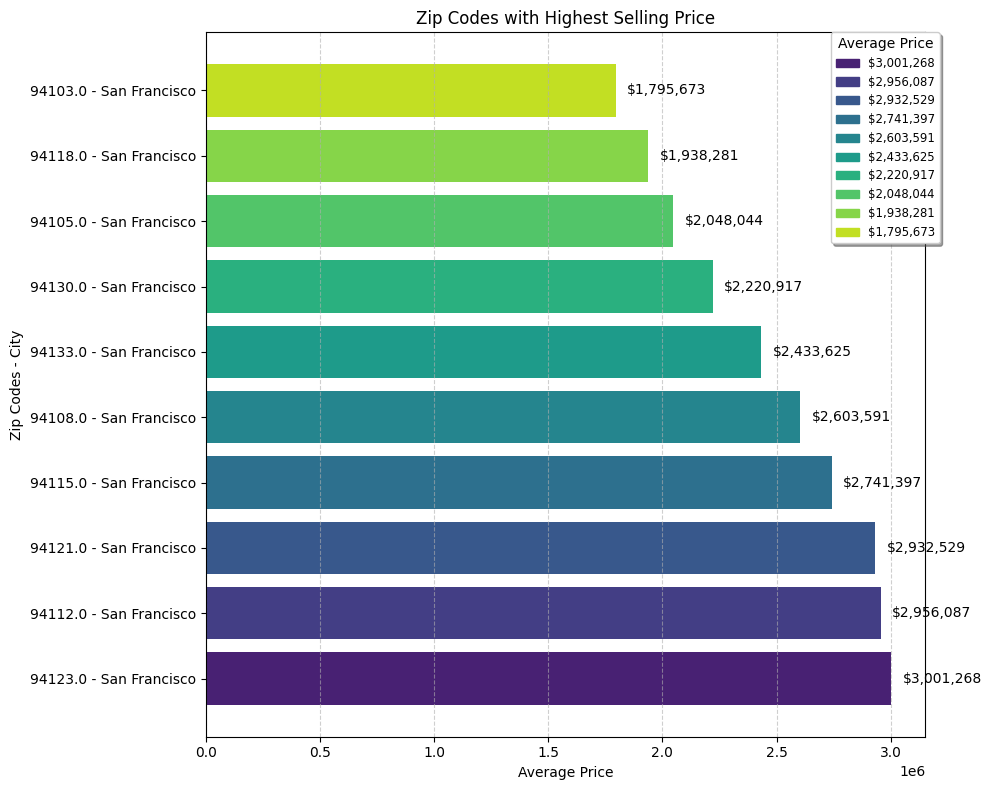

In [ ]:
#Zipcodes with Highest housing price
average_prices = dataframe.groupby(['zipcode', 'city'])['lastSoldPrice'].mean().reset_index()
average_prices = average_prices.sort_values('lastSoldPrice', ascending=False)

# Select top N zip codes based on higher average prices
top_n = 10  # You can adjust the number of top zip codes to display

top_zipcodes = average_prices.head(top_n)

# Create a color gradient for the bars
colors = sns.color_palette('viridis', n_colors=len(top_zipcodes))

# Creating the bar plot with city names and zip codes
plt.figure(figsize=(10, 8))
bars = plt.barh(top_zipcodes['zipcode'].astype(str) + ' - ' + top_zipcodes['city'],
                top_zipcodes['lastSoldPrice'],
                color=colors)

# Add labels and values on each bar
for bar, value in zip(bars, top_zipcodes['lastSoldPrice']):
    plt.text(bar.get_width() + 50000, bar.get_y() + bar.get_height() / 2, f"${value:,.0f}",
             va='center', ha='left', fontsize=10, color='black')

# Create custom legend based on the color gradient
legend_handles = [mpatches.Patch(color=color, label=f'${round(value):,.0f}')
                  for color, value in zip(colors, sorted(top_zipcodes['lastSoldPrice'], reverse=True))]

plt.legend(handles=legend_handles, title='Average Price', loc='upper right', bbox_to_anchor=(1.02, 1), borderaxespad=0.,
           fancybox=True, shadow=True, fontsize='small')

plt.title('Zip Codes with Highest Selling Price')
plt.xlabel('Average Price')
plt.ylabel('Zip Codes - City')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
#Interactive chart to display listing based on Selected zipcodes and house prices

# Calculate the center of the map based on the mean latitude and longitude
center_lat = dataframe['latitude'].mean()
center_lon = dataframe['longitude'].mean()

# Create an initial map centered at the calculated location
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Create a feature group for markers
marker_cluster = plugins.MarkerCluster().add_to(m)

# Add all markers to the feature group
for index, row in dataframe.iterrows():
    details = f"Price: ${row['listPrice']} | Bedrooms: {row['bedrooms']} | Bathrooms: {row['bathrooms']} | Zip Code: {row['zipcode']}"
    marker = folium.Marker([row['latitude'], row['longitude']], popup=details)
    marker.add_to(marker_cluster)

# Display the initial map
display(m)

# Create a function to filter and update the map
def filter_map(zipcode, price_range):
    # Create a new map instance
    m_filtered = folium.Map(location=[center_lat, center_lon], zoom_start=12)

    # Create a new feature group for markers
    marker_cluster_filtered = plugins.MarkerCluster().add_to(m_filtered)

    min_price, max_price = price_range  # Unpack the price range

    # Filter and add markers to the new feature group
    for index, row in dataframe.iterrows():
        if (zipcode == 'All' or row['zipcode'] == zipcode) and (min_price <= row['listPrice'] <= max_price):
            details = f"Price: ${row['listPrice']} | Bedrooms: {row['bedrooms']} | Bathrooms: {row['bathrooms']} | Zip Code: {row['zipcode']}"
            marker = folium.Marker([row['latitude'], row['longitude']], popup=details)
            marker.add_to(marker_cluster_filtered)

    # Display the filtered map
    display(m_filtered)

# Create interactive widgets for zip code and price range
zip_widget = widgets.Dropdown(
    options=['All'] + list(dataframe['zipcode'].unique()),
    value='All',
    description='Zip Code:'
)

price_widget = widgets.FloatRangeSlider(
    value=[dataframe['listPrice'].min(), dataframe['listPrice'].max()],
    min=dataframe['listPrice'].min(),
    max=dataframe['listPrice'].max(),
    description='Price Range:'
)

# Create an interactive filter
interact(filter_map, zipcode=zip_widget, price_range=price_widget)

interactive(children=(Dropdown(description='Zip Code:', options=('All', 95120.0, 95127.0, 95123.0, 95131.0, 95…

<function __main__.filter_map(zipcode, price_range)>

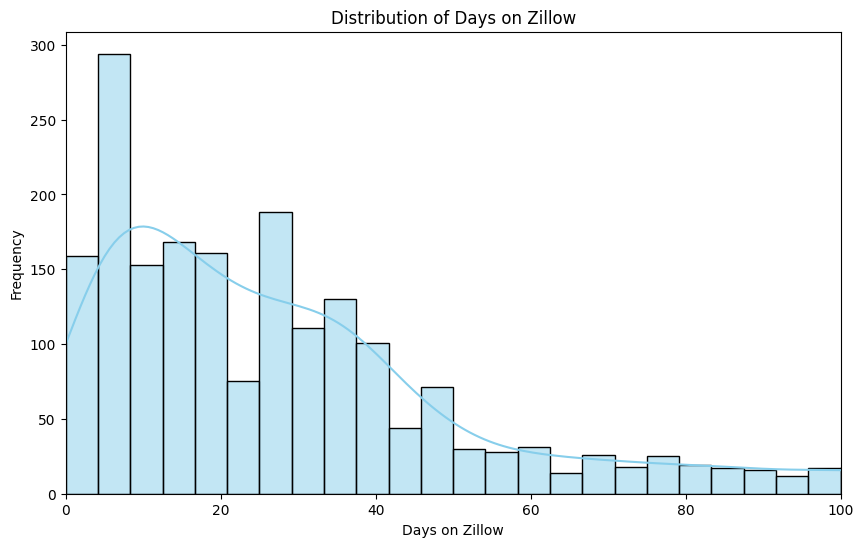

In [ ]:
#Distribution of Days on Zillow

plt.figure(figsize=(10, 6))
sns.histplot(dataframe['daysOnZillow'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Days on Zillow')
plt.xlabel('Days on Zillow')
plt.ylabel('Frequency')

# Set x-axis limits
plt.xlim(0, 100)

plt.show()


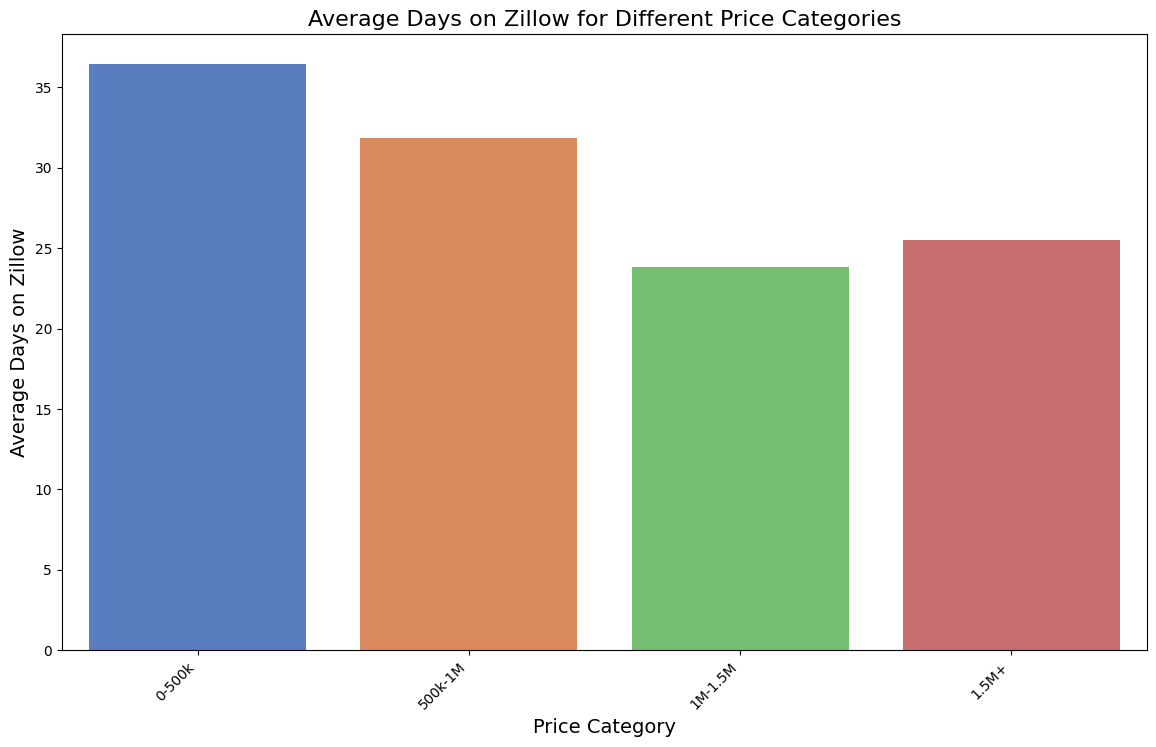

In [ ]:
#Average Days on Zillow for different Price categories

sorted_dataframe = dataframe.copy()
sorted_dataframe['Price Category'] = pd.cut(sorted_dataframe['lastSoldPrice'], bins=[0, 500000, 1000000, 1500000, np.inf],
                                    labels=['0-500k', '500k-1M', '1M-1.5M', '1.5M+'])

# Set a larger figure size for better visibility
plt.figure(figsize=(14, 8))

# Calculate the average days on Zillow for each price category
average_days = sorted_dataframe.groupby('Price Category')['daysOnZillow'].mean().reset_index()

# Use a bar plot with a different color palette
sns.barplot(x='Price Category', y='daysOnZillow', data=average_days, palette='muted')

# Add labels and title
plt.title('Average Days on Zillow for Different Price Categories', fontsize=16)
plt.xlabel('Price Category', fontsize=14)
plt.ylabel('Average Days on Zillow', fontsize=14)

# Customize the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


<ipython-input-106-c45381a2447a>:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.




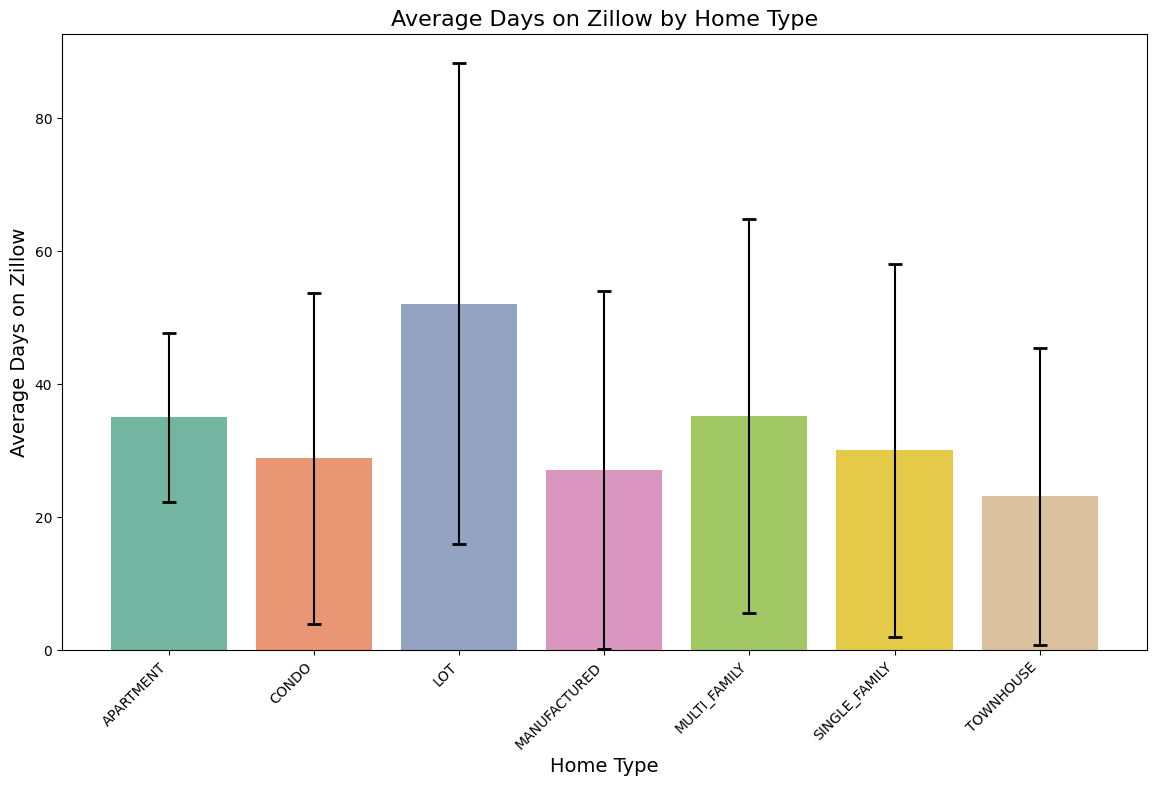

In [ ]:
#Average days on Zillow on basis of Home type
mean_days = dataframe.groupby('homeType')['daysOnZillow'].mean()
std_days = dataframe.groupby('homeType')['daysOnZillow'].std()

plt.figure(figsize=(14, 8))

sns.barplot(x=mean_days.index, y=mean_days, palette='Set2', ci='sd')

plt.errorbar(x=mean_days.index, y=mean_days, yerr=std_days, fmt='none', color='black', capsize=5, capthick=2)

plt.title('Average Days on Zillow by Home Type', fontsize=16)
plt.xlabel('Home Type', fontsize=14)
plt.ylabel('Average Days on Zillow', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
#Converting Parking to String
dataframe['Parking'] = dataframe['Parking'].astype(str)
#Converting Dateposted and DateSold to integers
dataframe['datePosted'] = pd.to_datetime(dataframe['datePosted'])
dataframe['datePosted'] = dataframe['datePosted'].astype(int) / 10**9
dataframe['dateSold'] = dataframe['dateSold'].astype(int) / 10**9

In [ ]:
#Dropping unnecessary columns for prediction
dataframe.drop(columns=['hdpUrl','address','streetAddress','description','Parking'], inplace=True)
dataframe.reset_index(drop=True, inplace=True)

In [ ]:
#Performing One hot encoding
categorical_columns = ['lotAreaUnits', 'isBankOwned', 'city','state','county','homeType','isZillowOwned','wasForeclosed','isListedByOwner',]
dataframe= pd.get_dummies(dataframe, columns=categorical_columns)

In [ ]:
dataframe.head(5)

zpId  arm5Rate  daysOnZillow    datePosted      dateSold  zipcode  \
0   19846948     7.291           0.0  1.698192e+09  1.071533e+09  95120.0   
1   19782851     7.291           0.0  1.698192e+09  1.470355e+09  95127.0   
2   19831756     7.291           0.0  1.698192e+09  1.672358e+09  95123.0   
3  124743687     7.291           0.0  1.698192e+09  9.466848e+08  95131.0   
4   19562628     7.543           0.0  1.698192e+09  9.466848e+08  95131.0   

   lastSoldPrice  livingAreaValue  Zestimate Average _2018  stories  ...  \
0       520000.0           1470.0             1.102468e+06      2.0  ...   
1       775000.0           2014.0             1.005544e+06      1.0  ...   
2       630000.0            904.0             6.245410e+05      1.0  ...   
3       998000.0           1371.0             0.000000e+00      3.0  ...   
4      1698000.0           2870.0             1.507160e+06      1.0  ...   

   homeType_LOT  homeType_MANUFACTURED  homeType_MULTI_FAMILY  \
0             0                      0                      0   
1             0                      0                      0   
2             0                      0                      0   
3             0                      0                      0   
4             0                      0                      0   

   homeType_SINGLE_FAMILY  homeType_TOWNHOUSE  isZillowOwned_False  \
0                       1                   0                    1   
1                       1                   0                    1   
2                       0                   0                    1   
3                       0                   1                    1   
4                       1                   0                    1   

   wasForeclosed_False  wasForeclosed_True  isListedByOwner_False  \
0                    1                   0                      1   
1                    1                   0                      1   
2                    1                   0                      1   
3                    1                   0                      1   
4                    1                   0                      1   

   isListedByOwner_True  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 50 columns]

In [ ]:
dataframe.columns

Index(['zpId', 'arm5Rate', 'daysOnZillow', 'datePosted', 'dateSold', 'zipcode',
       'lastSoldPrice', 'livingAreaValue', 'Zestimate Average _2018',
       'stories', 'Zestimate Average _2023', 'latitude',
       'Zestimate Average _2021', 'Price_per_unit', 'Year Built',
       'Zestimate Average _2019', 'Zestimate Average _2020', 'longitude',
       'bathrooms', 'listPrice', 'thirtyYearFixedRate', 'zestimate',
       'bedrooms', 'lotAreaValue', 'fifteenYearFixedRate',
       'Zestimate Average _2022', 'Age_inYears', 'lotAreaUnits_Acres',
       'lotAreaUnits_Square Feet', 'isBankOwned_False', 'isBankOwned_True',
       'city_Oakland', 'city_San Francisco', 'city_San Jose', 'state_CA',
       'county_Alameda County', 'county_San Francisco County',
       'county_Santa Clara County', 'homeType_APARTMENT', 'homeType_CONDO',
       'homeType_LOT', 'homeType_MANUFACTURED', 'homeType_MULTI_FAMILY',
       'homeType_SINGLE_FAMILY', 'homeType_TOWNHOUSE', 'isZillowOwned_False',
       'wasFor

In [ ]:
# Define the feature matrix X and the target variable y
X = dataframe.drop('lastSoldPrice', axis=1)
y = dataframe['lastSoldPrice']

# Split the data into training and testing sets with an 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1593, 49)
X_test shape: (399, 49)
y_train shape: (1593,)
y_test shape: (399,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Checking the shape of the datasets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((1593, 49), (399, 49), (1593,), (399,))

In [ ]:
#KNN Implementation
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, y_pred)


print(f"Mean Absolute Error of KNN: {knn_mae}")
print(f"Mean Square Error of KNN: {knn_mse}")
print(f"Root Mean Squared Error of KNN : {knn_rmse}")

Mean Absolute Error of KNN: 431721.6685463659
Mean Square Error of KNN: 1147028043194.49
Root Mean Squared Error of KNN : 1070993.9510541083


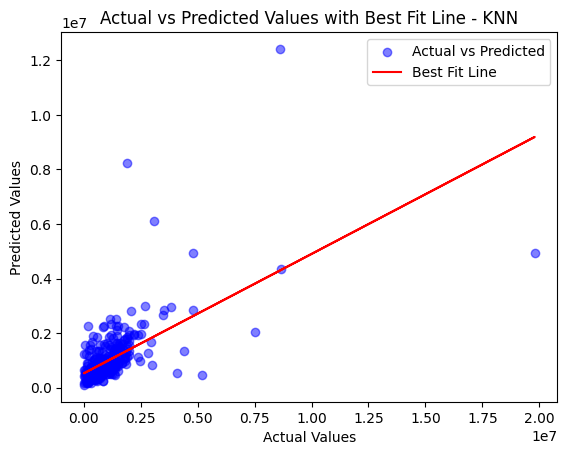

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')

# Best fit line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Best Fit Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line - KNN')
plt.legend()

# Show plot
plt.show()

In [ ]:
#K-fold Cross Validations

k_values = range(1, 30)

# Empty list to store scores
cross_val_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    cross_val_scores.append(np.mean(rmse_scores))



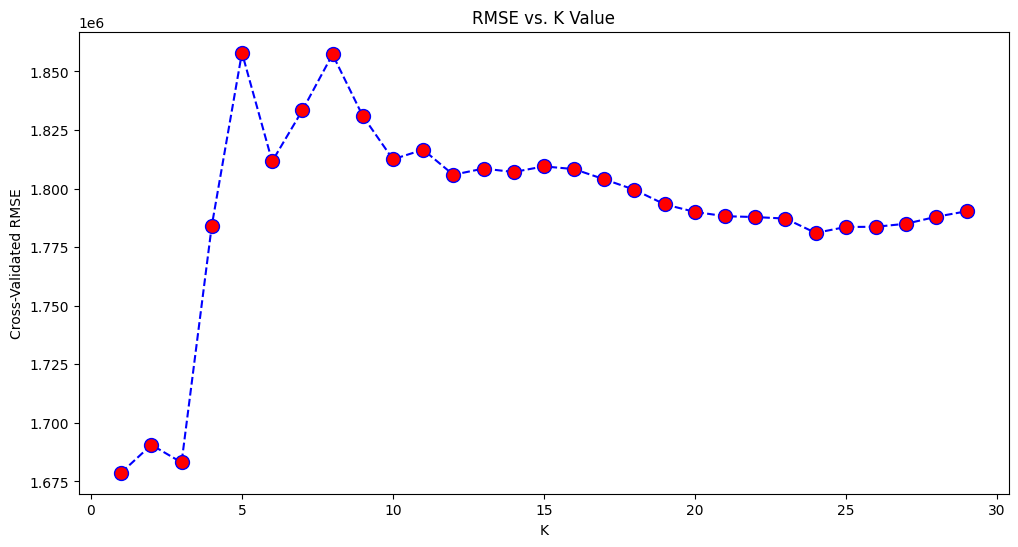

In [ ]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(k_values, cross_val_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('RMSE vs. K Value')
plt.xlabel('K')
plt.ylabel('Cross-Validated RMSE')
plt.show()


From the Graph, The Ideal value of K looks to be at K=6

In [ ]:
ideal_knn = KNeighborsRegressor(n_neighbors=6)
ideal_knn.fit(X_train_scaled, y_train)
y_pred = ideal_knn.predict(X_test_scaled)
ideal_mse = mean_squared_error(y_test, y_pred)
ideal_rmse = np.sqrt(ideal_mse)
ideal_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of KNN using K fold validation: {ideal_mae}")
print(f"Mean Square Error of KNN using K fold validation: {ideal_mse}")
print(f"Root Mean Squared Error of KNN using K fold validation: {ideal_rmse}")

Mean Absolute Error of KNN using K fold validation: 422407.72180451127
Mean Square Error of KNN using K fold validation: 1112641114262.0098
Root Mean Squared Error of KNN using K fold validation: 1054818.0479409753


In [ ]:
# Grid Search using the KNN model
grid_knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(estimator=grid_knn, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

grid_search.fit(X_train_scaled, y_train)

best_parameters_grid_knn = grid_search.best_params_
print(f"Best Parameters of KNN using grid: {best_parameters_grid_knn}")

# Re-train the model with the best parameters
grid_knn = KNeighborsRegressor(**best_parameters_grid_knn)
grid_knn.fit(X_train, y_train)

# Make predictions
y_pred = grid_knn.predict(X_test_scaled)
# Calculate MAE
grid_knn_mae = mean_absolute_error(y_test, y_pred)
grid_knn_mse = mean_squared_error(y_test, y_pred)
grid_knn_rmse = np.sqrt(grid_knn_mse)
print(f"Mean Absolute Error of KNN with Best Parameters using Grid Search: {grid_knn_mae}")
print(f"Mean Square Error of KNN with Best Parameters using Grid Search: {grid_knn_mse}")
print(f"Root Mean Squared of KNN Error with Best Parameters using Grid Search:{grid_knn_rmse}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters of KNN using grid: {'metric': 'manhattan', 'n_neighbors': 7}
Mean Absolute Error of KNN with Best Parameters using Grid Search: 887261.158252775
Mean Square Error of KNN with Best Parameters using Grid Search: 2614413248025.6646
Root Mean Squared of KNN Error with Best Parameters using Grid Search:1616914.7312167282


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [ ]:
#Random Search KNN
random_knn = KNeighborsRegressor()


param_dist = {
    'n_neighbors': list(range(1, 31)),  # Range of 'n_neighbors' to try
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

random_search = RandomizedSearchCV(estimator=random_knn, param_distributions=param_dist,
                                   n_iter=100, cv=5, verbose=2, random_state=42,
                                   n_jobs=-1, scoring='neg_mean_absolute_error')

random_search.fit(X_train_scaled, y_train)

# Best parameters found
best_parameters_random_knn = random_search.best_params_
print(f"Best Parameters using Random search: {best_parameters_random_knn }")

# Re-train the model with the best parameters
random_knn = KNeighborsRegressor(**best_parameters_random_knn)
random_knn.fit(X_train, y_train)

y_pred = random_knn.predict(X_test_scaled)

random_knn_mae = mean_absolute_error(y_test, y_pred)
random_knn_mse= mean_squared_error(y_test, y_pred)
random_knn_rmse= np.sqrt(random_knn_mse)
print(f"Mean Absolute Error of KNN with Best Parameters using Random search: {random_knn_mae}")
print(f"Mean Square Error of KNN with Best Parameters using Random Search search: {random_knn_mse}")
print(f"Root Mean Squared Error of KNN with Best Parameters using Random Search:{random_knn_rmse}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.



Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters using Random search: {'n_neighbors': 6, 'metric': 'manhattan'}
Mean Absolute Error of KNN with Best Parameters using Random search: 885334.1979949876
Mean Square Error of KNN with Best Parameters using Random Search search: 2610573386030.1997
Root Mean Squared Error of KNN with Best Parameters using Random Search:1615726.8909163454


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [ ]:
#Bagging on KNN
bagging_knn = KNeighborsRegressor()
bagging_model_knn = BaggingRegressor(base_estimator=bagging_knn, n_estimators=10, random_state=0)
bagging_model_knn.fit(X_train_scaled, y_train)
y_pred_knn = bagging_model_knn.predict(X_test_scaled)
bagging_knn_mse = mean_squared_error(y_test, y_pred)
bagging_knn_rmse = np.sqrt(bagging_knn_mse)
bagging_knn_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of KNN using Bagging: {bagging_knn_mae}")
print(f"Mean Square Error of KNN using Bagging: {bagging_knn_mse}")
print(f"Root Mean Squared Error of KNN using Bagging: {bagging_knn_rmse}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Mean Absolute Error of KNN using Bagging: 413958.3784461153
Mean Square Error of KNN using Bagging: 1045158588318.772
Root Mean Squared Error of KNN using Bagging: 1022329.9801525787


In [ ]:
#ADA Boost on KNN
from sklearn.ensemble import AdaBoostRegressor

adaboost_knn = KNeighborsRegressor()

# Initialize AdaBoost Regressor with KNN as the base estimator
ada_boost_knn = AdaBoostRegressor(base_estimator=adaboost_knn, n_estimators=50, random_state=0)
ada_boost_knn.fit(X_train_scaled, y_train)

y_pred_knn_boosted = ada_boost_knn.predict(X_test_scaled)
adaboost_knn_mse = mean_squared_error(y_test, y_pred)
adaboost_knn_rmse = np.sqrt(adaboost_knn_mse)
adaboost_knn_mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of KNN using ADA Boost: {adaboost_knn_mae}")
print(f"Mean Square Error of KNN using ADA Boost: {adaboost_knn_mse}")
print(f"Root Mean Squared Error of KNN using ADA Boost: {adaboost_knn_rmse}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Mean Absolute Error of KNN using ADA Boost: 413958.3784461153
Mean Square Error of KNN using ADA Boost: 1045158588318.772
Root Mean Squared Error of KNN using ADA Boost: 1022329.9801525787


In [ ]:
#Random Forrest Implementation
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

print(f"Mean Absolute Error of Random Forest: {rf_mae}")
print(f"Mean Squared Error of Random Forest:{rf_mse}")
print(f"Root Mean Squared Error of Random Forest: {rf_rmse}")

Mean Absolute Error of Random Forest: 247995.48844611528
Mean Squared Error of Random Forest:1044392814226.7236
Root Mean Squared Error of Random Forest: 1021955.3875912215


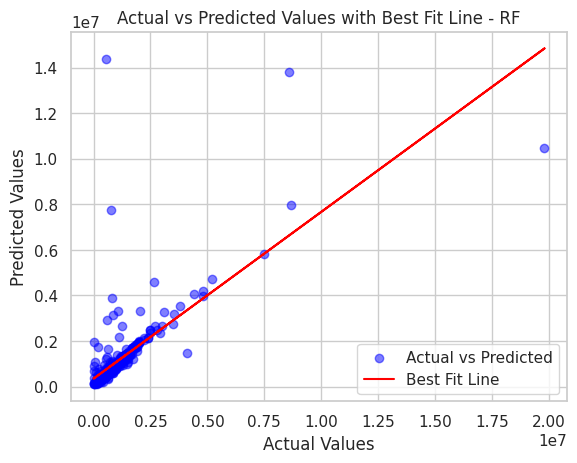

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')

# Best fit line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Best Fit Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line - RF')
plt.legend()

# Show plot
plt.show()

In [ ]:
#Bagging on Random Forest

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

bagging_rf = RandomForestRegressor(n_estimators=100)
bagging_model = BaggingRegressor(base_estimator=bagging_rf, n_estimators=10, random_state=0)
bagging_model.fit(X_train_scaled, y_train)
y_pred = bagging_model.predict(X_test_scaled)

bagging_rf_mae = mean_absolute_error(y_test, y_pred)
bagging_rf_mse = mean_squared_error(y_test, y_pred)
bagging_rf_rmse = np.sqrt(bagging_rf_mse)

print(f"Mean Absolute Error of Random Forest using Bagging: {bagging_rf_mae}")
print(f"Mean Squared Error of Random Forest using Bagging: {bagging_rf_mse}")
print(f"Root Mean Squared Error of Random Forest using Bagging: {bagging_rf_rmse}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Mean Absolute Error of Random Forest using Bagging: 231040.51287969924
Mean Squared Error of Random Forest using Bagging: 616499635267.4927
Root Mean Squared Error of Random Forest using Bagging: 785174.9074362302


In [ ]:
#XGBoost
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)

print(f"Mean Absolute Error of XGBoost: {xgb_mae}")
print(f"Mean Squared Error of XGBoost: {xgb_mse}")
print(f"Root Mean Squared Error of XGBoost: {xgb_rmse}")

Mean Absolute Error of XGBoost: 219448.24492872806
Mean Squared Error of XGBoost: 792679075327.7368
Root Mean Squared Error of XGBoost: 890325.2637815782


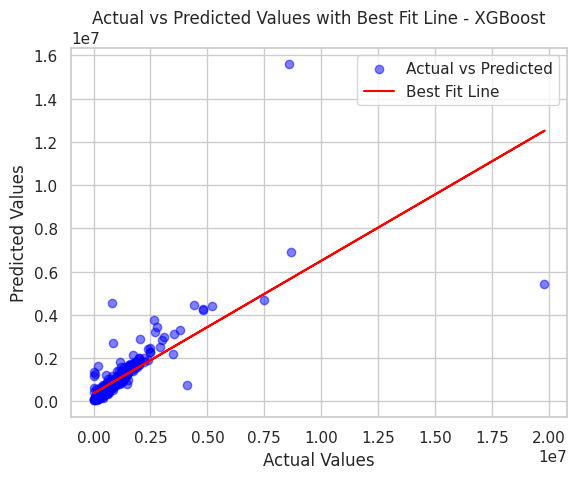

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')

# Best fit line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Best Fit Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line - XGBoost')
plt.legend()

# Show plot
plt.show()

In [ ]:
#Grid Search on XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8]
}
grid_xgb = XGBRegressor()

grid_search = GridSearchCV(estimator=grid_xgb, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)
grid_best_params_xgb = grid_search.best_params_

print(f"Best Parameters: {grid_best_params_xgb}")

# Train the model using the best parameters
grid_xgb = XGBRegressor(**grid_best_params_xgb)
grid_xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = grid_xgb.predict(X_test_scaled)

# Calculate evaluation metrics
grid_xgb_mse = mean_squared_error(y_test, y_pred)
grid_xgb_rmse = np.sqrt(grid_xgb_mse)
grid_xgb_mae= mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of XGBoost Forrest with Best Parameters using Grid Search:{grid_xgb_mae}")
print(f"Mean Squared Error of XGBoost with Best Parameters using Grid Search:{grid_xgb_mse}")
print(f"Root Mean Squared Error of XGBoost with Best Parameters using Grid Search: {grid_xgb_rmse}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
Mean Absolute Error of XGBoost Forrest with Best Parameters using Grid Search:402174.10808270675
Mean Squared Error of XGBoost with Best Parameters using Grid Search:878992431586.2421
Root Mean Squared Error of XGBoost with Best Parameters using Grid Search: 937545.9623859739


In [ ]:
#Random Search on XGBoost
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
    'subsample': [0.5, 0.7, 0.9, 1.0]
}
random_xgb = XGBRegressor()

random_search = RandomizedSearchCV(estimator=random_xgb, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42,
                                   n_jobs=-1, scoring='neg_mean_squared_error')

random_search.fit(X_train_scaled, y_train)
random_best_params_xgb = random_search.best_params_
print(f"Best Parameters: {random_best_params_xgb}")

# Train the model using the best parameters
random_xgb = XGBRegressor(**random_best_params_xgb)
random_xgb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = random_xgb.predict(X_test_scaled)

# Calculate evaluation metrics
random_xgb_mse = mean_squared_error(y_test, y_pred)
random_xgb_rmse = np.sqrt(random_xgb_mse)
random_xgb_mae= mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of XGBoost with Best Parameters using Random Search: {random_xgb_mae}")
print(f"Mean Squared Error of XGBoost with Best Parameters using Random Search: {random_xgb_mse}")
print(f"Root Mean Squared Error of XGBoost with Best Parameters using Random Search: {random_xgb_rmse}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
Mean Absolute Error of XGBoost with Best Parameters using Random Search: 319812.0038377193
Mean Squared Error of XGBoost with Best Parameters using Random Search: 646646812521.8193
Root Mean Squared Error of XGBoost with Best Parameters using Random Search: 804143.5273145083


In [ ]:
#Bagging on XGBoost
xgb = XGBRegressor()
bagging_xgb = BaggingRegressor(base_estimator=xgb, n_estimators=10, random_state=0)
bagging_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = bagging_xgb.predict(X_test_scaled)
bagging_xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
bagging_xgb_mse = mean_squared_error(y_test, y_pred_xgb)
bagging_xgb_rmse = np.sqrt(bagging_xgb_mae)

print(f"Mean Absolute Error of XGBoost using Bagging: {bagging_xgb_mae}")
print(f"Mean Squared Error of XGBoost using Bagging: {bagging_xgb_mse}")
print(f"Root Mean Squared Error of XGBoost using Bagging: {bagging_xgb_rmse}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Mean Absolute Error of XGBoost using Bagging: 230442.87054550438
Mean Squared Error of XGBoost using Bagging: 803271510236.7816
Root Mean Squared Error of XGBoost using Bagging: 480.0446547411026


In [ ]:
pip install cmake

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [ ]:
#CatBoost
from catboost import CatBoostRegressor

catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6,silent=True)
catboost_model.fit(X_train_scaled, y_train)
y_pred = catboost_model.predict(X_test_scaled)

catboost_mae = mean_absolute_error(y_test, y_pred)
catboost_mse = mean_squared_error(y_test, y_pred)
catboost_rmse = np.sqrt(catboost_mse)

print(f"Mean Absolute Error of CatBoost: {catboost_mae}")
print(f"Mean Squared Error of CatBoost: {catboost_mse}")
print(f"Root Mean Squared Error of CatBoost: {catboost_rmse}")

Mean Absolute Error of CatBoost: 293393.65772209177
Mean Squared Error of CatBoost: 901907688621.2156
Root Mean Squared Error of CatBoost: 949688.20600301


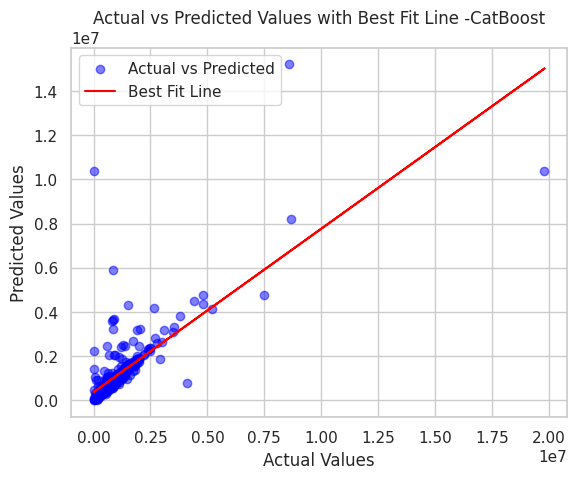

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')

# Best fit line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Best Fit Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line -CatBoost')
plt.legend()

# Show plot
plt.show()

In [ ]:
pip install lightgbm

In [ ]:
#LightBoost
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbm_model = lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=100)
lgbm_model.fit(X_train_scaled, y_train, eval_set=[(X_test, y_test)], eval_metric='l1')
y_pred = lgbm_model.predict(X_test_scaled, num_iteration=lgbm_model.best_iteration_)

lgbm_mae = mean_absolute_error(y_test, y_pred)
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = np.sqrt(lgbm_mse)

print(f"Mean Absolute Error of LightGBM: {lgbm_mae}")
print(f"Mean Squared Error of LightGBM: {lgbm_mse}")
print(f"Root Mean Squared Error of LightGBM: {lgbm_rmse}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4436
[LightGBM] [Info] Number of data points in the train set: 1593, number of used features: 38
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 1137618.693032
Mean Absolute Error of LightGBM: 311967.43912338954
Mean Squared Error of LightGBM: 741692011958.5001
Root Mean Squared Error of LightGBM: 861215.4271484575


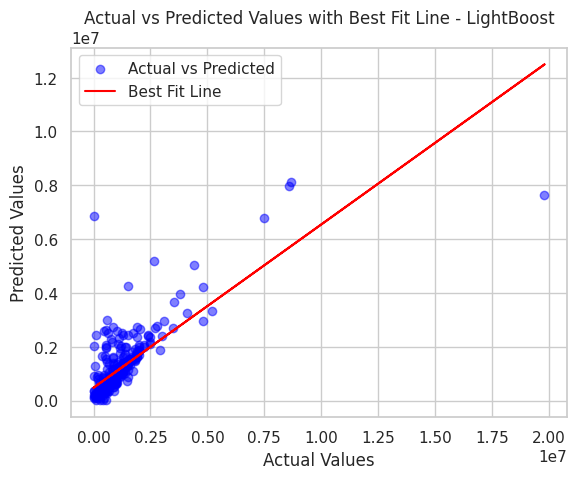

In [ ]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')

# Best fit line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Best Fit Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line - LightBoost')
plt.legend()

# Show plot
plt.show()

As MAE value is not effected by outliers hence MAE is considered than MSE and RMSE

In [ ]:
# MAE values for each model and method
mae_values = {
    "KNN": knn_mae,
    "KNN Grid Search": grid_knn_mae,
    "KNN Random Search": random_knn_mae,
    "Bagging on KNN":bagging_knn_mae,
    "ADA Boost on KNN":adaboost_knn_mae,
    "Random Forest": rf_mae,
    "Bagging on Random Forest":bagging_rf_mae,
    "XGBoost": xgb_mae,
    "XGBoost Grid Search": grid_xgb_mae,
    "XGBoost Random Search": random_xgb_mae,
    "Bagging on XGBoost":bagging_xgb_mae,
    "CatBoost": catboost_mae,
    "LightGBM": lgbm_mae,
}

# Find the model with the lowest MAE
best_model = min(mae_values, key=mae_values.get)
best_mae = mae_values[best_model]

print(f"The best model based on MAE is {best_model} with an MAE of {best_mae}")


The best model based on MAE is XGBoost with an MAE of 219448.24492872806


In [ ]:
for model, mae in mae_values.items():
    print(f"{model}: {mae}")

KNN: 431721.6685463659
KNN Grid Search: 887261.158252775
KNN Random Search: 885334.1979949876
Bagging on KNN: 413958.3784461153
ADA Boost on KNN: 413958.3784461153
Random Forest: 247995.48844611528
Bagging on Random Forest: 231040.51287969924
XGBoost: 219448.24492872806
XGBoost Grid Search: 402174.10808270675
XGBoost Random Search: 319812.0038377193
Bagging on XGBoost: 230442.87054550438
CatBoost: 293393.65772209177
LightGBM: 311967.43912338954


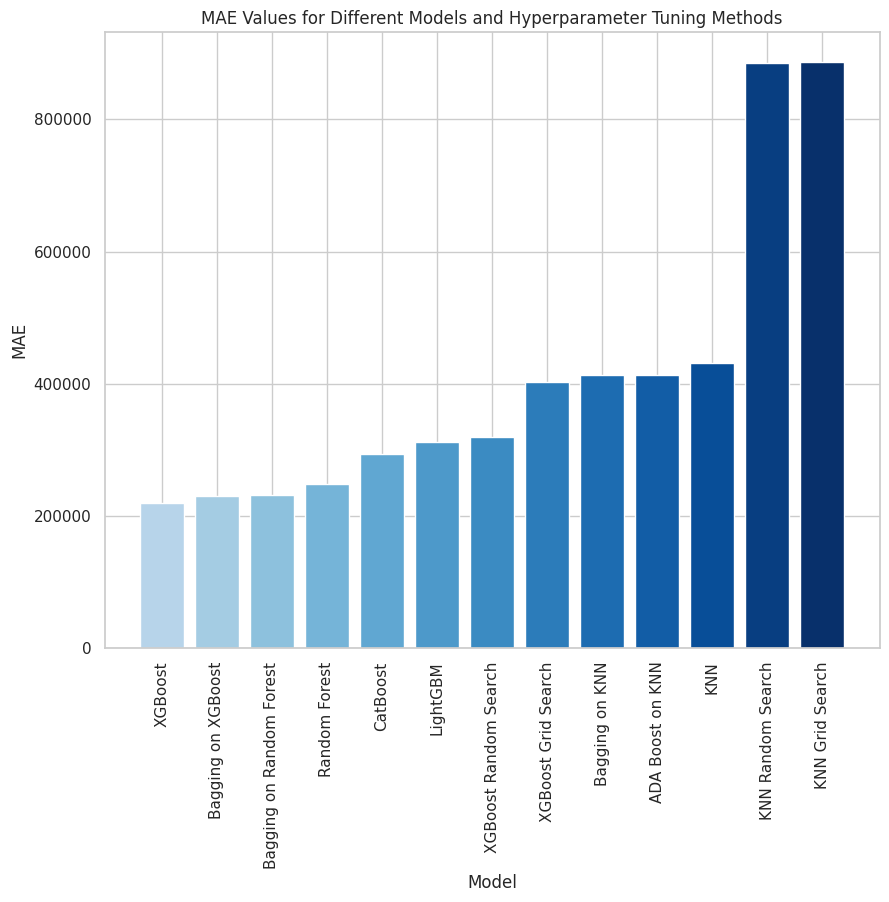

In [ ]:
sorted_models = sorted(mae_values, key=mae_values.get)

# Assigning colors - lightest for lowest MAE, darkest for highest
colors = plt.cm.Blues(np.linspace(0.3, 1, len(sorted_models)))

# Rearrange MAE values according to the sorted order
sorted_mae_values = [mae_values[model] for model in sorted_models]

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(sorted_models, sorted_mae_values, color=colors)
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=90)
plt.title('MAE Values for Different Models and Hyperparameter Tuning Methods')
plt.show()

Based on the data found XGBoost is found to be the best working model with least MAE value. Hence the XGBoost model is again run on 70:30 Split

In [ ]:
# Define the feature matrix X and the target variable y
X = dataframe.drop('lastSoldPrice', axis=1)
y = dataframe['lastSoldPrice']

# Split the data into training and testing sets with an 80:20 split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (1394, 49)
X_test shape: (598, 49)
y_train shape: (1394,)
y_test shape: (598,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled_new = scaler.fit_transform(X_train_new)

# Transform the test data using the same scaler
X_test_scaled_new = scaler.transform(X_test_new)

# Checking the shape of the datasets
X_train_scaled_new.shape, X_test_scaled_new.shape, y_train.shape, y_test.shape

((1394, 49), (598, 49), (1394,), (598,))

In [ ]:
#XGBoost
xgb = XGBRegressor()
xgb.fit(X_train_scaled_new, y_train)
y_pred_new = xgb.predict(X_test_scaled_new)

xgb_mae = mean_absolute_error(y_test, y_pred_new)
xgb_mse = mean_squared_error(y_test, y_pred_new)
xgb_rmse = np.sqrt(xgb_mse)

print(f"Mean Absolute Error of XGBoost: {xgb_mae}")
print(f"Mean Squared Error of XGBoost: {xgb_mse}")
print(f"Root Mean Squared Error of XGBoost: {xgb_rmse}")

Mean Absolute Error of XGBoost: 351202.1868582123
Mean Squared Error of XGBoost: 2913868838144.449
Root Mean Squared Error of XGBoost: 1707005.8108115653


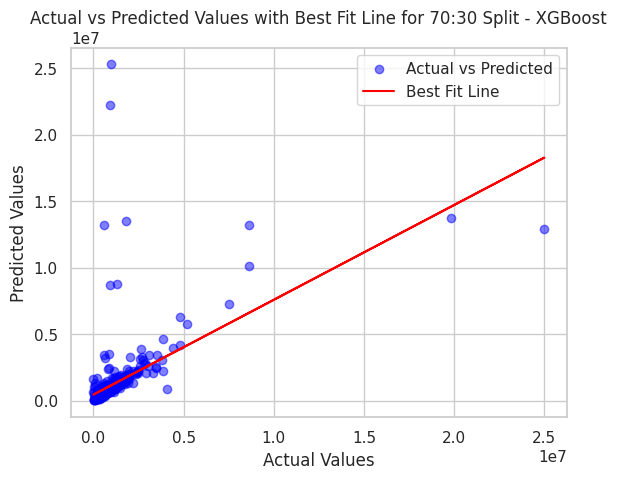

In [ ]:
plt.scatter(y_test, y_pred_new, color='blue', alpha=0.5, label='Actual vs Predicted')

# Best fit line
m, b = np.polyfit(y_test, y_pred_new, 1)
plt.plot(y_test, m*y_test + b, color='red', label='Best Fit Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line for 70:30 Split - XGBoost')
plt.legend()

# Show plot
plt.show()